# External Acidity as Performance Descriptor in Polyolefin Cracking using Zeolite-Based Materials
Sebastian Rejman<sup>1</sup>, Zoe M. Reverdy<sup>1</sup>, Zeynep Bör,<sup>1</sup> Carolin Rieg,<sup>1</sup>Joren M. Dorresteijn,<sup>1</sup> Jan-Kees van der Waal<sup>2</sup> Eelco T.C. Vogt,<sup>1</sup> Ina Vollmer,<sup>1</sup>* Bert M. Weckhuysen,<sup>1</sup>*

<sup>1</sup> Inorganic Chemistry and Catalysis, Institute for Sustainable and Circular Chemistry, Department of Chemistry, Utrecht University, Universiteitsweg 99, 3584 CG Utrecht, The Netherlands.

<sup>2</sup> TNO, Pieter Calandweg 15, 2628 CP Delft, The Netherlands

## Installing of modules- and downloading data (Google collab only. Comment the following cells out if running locally)

This notebook is set up to run in google collab. If you intend to run this notebook on your own machine, check the readme file instructions.
We first get the required code and install the necessary modules

In [1]:
!git clone https://github.com/MyonicS/External_Acidity_Paper
%cd External_Acidity_Paper

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()

In [3]:
!conda config --add channels conda-forge
!conda config --add channels spectrocat
!conda config --add channels cantera
!mamba install spectrochempy &>> output_scp_install.log
!conda install --yes --file requirements.txt &>> output_other.log
!pip install datahugger &>> output_dh_install.log
exit()

We then download the experimental data from the OSF repository

In [4]:
%cd External_Acidity_Paper # required in case of kernel crash
import datahugger
datahugger.get("10.17605/OSF.IO/PFXH6", "data_dh",unzip=False)
!unzip data_dh/data.zip -d data &>> output_unzipping.log
exit()

## Importing of packages

We can now import all the necessary python modules and specify where to get the data and store the figures.

In [5]:
%cd External_Acidity_Paper # required in case of kernel crash
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress
from matplotlib import pyplot as plt, ticker as mticker
from matplotlib.lines import Line2D
import math
import random

#importing custom functions
from utils.misc.plot_params import *
from utils.spectroscopy import IR_utils as ir
from utils.TGA import TGA_utils as tga
from utils.misc import db_query as dbq
import utils.GC.gcgc_utils as gcgc
import utils.GC.online_pygcms_utils as ogc
import utils.simulation.cracking_simulation as cs

plt.rcParams.update(plt.rcParamsDefault)
set_plot_params()

fig_dir = os.getcwd()+"/figures"
data_home = os.getcwd()+"/data"
result_dir = os.getcwd()+"/results"

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.8© Copyright 2014-2024 - A.Travert & C.Fernandez @ LCS


## Abstract
Thermal pyrolysis is gaining industrial adoption to convert large volumes of plastic waste into hydrocarbon feedstock. However, it suffers from a high reaction temperature and relatively low selectivity. Utilizing a catalyst in the process, moving from thermal pyrolysis to catalytic cracking could help overcome both challenges. In order to develop efficient catalyst materials for this process, understanding structure-composition-performance relationships is critical. In this work, we show that in contrast to cracking of small molecules, plastic cracking activity using ultrastable zeolite Y materials does not depend on the bulk Brønsted acid site content, but rather on the concentration of acid sites located on the outer surface and in mesopores. This external acidity, however, fails to capture all the observed performance trends. Detailed kinetic experiments revealed that the scaling of the reaction rate with the catalyst loading differs drastically between highly similar catalyst materials. More specifically, doubling the catalyst loading leads to doubling of the reaction rate for one material, while for another it leads to more than fivefold increase. When very bulky reactants, such as polyolefins, are converted over microporous catalysts, structure-composition-performance relationships established for smaller molecules need to be revisited. 

## Introduction
Plastics represent more than 40% of the annual output of the global chemical industry.[1] In order to convert large amounts of plastic waste into useful products, new processes with the required scale need to developed. A process that meets this criterion and is gaining industrial application is pyrolysis. Its major downside, however, is the large required temperature (>500 °C) and poor selectivity.[2] In crude oil refining, both problems were overcome by the move from destructive distillation to catalytic cracking.[3] In a similar fashion, cracking catalysis could enable processing of polyolefin plastic waste at scale with improved selectivity. A first commercial plant for catalytic cracking of plastics with a 50 kiloton per year capacity was recently announced.[4] In order to develop improved catalysts for catalytic cracking of polyolefins, the properties affecting their performance must be understood. To take the first step towards this goal, we considered the composition-performance relationships established over the past 50 years in the cracking of small hydrocarbon molecules. For the workhorse of cracking catalysis, namely zeolites like zeolite Y (ZY), these relationships have been studied extensively. Cracking catalyst performance is most commonly assessed by determining the first order rate constant for cracking of a small hydrocarbon like hexane,[5–9] or by the micro-activity testing (MAT), in which vacuum gas oil (VGO) is converted.[10] The two metrics have been correlated.[10] The activity of a zeolite in the cracking of smaller hydrocarbons depends on a plethora of parameters: The concentration of acid sites,[5] their strength,[6] confinement and adsorption effects,[11,12] and mass transport effects.[7] In addition, depending on the zeolite and the reaction conditions chosen, different mechanisms can dominate.[8,9] The level of understanding for the cracking of polymers, such as polypropylene (PP), is however limited.[13] A major obstacle in studying the polyolefin cracking reaction is the difficulty in obtaining reliable kinetic information. Since plastics are solid at room temperature and highly viscous when molten, most studies rely on thermogravimetric (TGA) approaches, which in general can only yield apparent kinetic parameters. For example for the thermal pyrolysis of polyethylene (PE), apparent activation energies (Ea) between 200 and 300 kj/mol and compensation effects were reported.[14] A higher Ea is offset by a higher preexponential factor. If the logarithm of the preexponential factor (A) is plotted against Ea a linear relationship with a slope of 1/RT* is observed, where R is the ideal gas constant and T* is the mean of measurement temperatures. This type of compensation behavior is common in heterogenous catalysis,[15,16] and was also observed in cracking of multiple hydrocarbons over a variety of zeolite based materials.[17] Caution is warranted when interpreting this type of result, as apparent compensation relationships can be caused by both mathematical and experimental errors, and there is no general agreement how compensation effects are to be interpreted.[15,16] In the case of cracking of lighter hydrocarbons, a compensation effect was explained by kinetics being dominated by the adsorption behavior, for which a linear relationship between enthalpy and entropy was shown.[17]

Returning to catalytic cracking of polymers, such as PE and PP, prior work showed that for ZSM-5[18,19] and for mesoporous beta zeolite[20] the activity in PE cracking increases with increasing external or mesopore surface area respectively. Different zeolite topologies were also compared with each other,[13] however it remains a challenge disentangling the effects of pore structure from the effects of acidity. 

If a clear link between activity in small molecule and polyolefin cracking could be established, it would indicate that structure-composition-performance relationships determined for the former still hold for the latter thus allowing to use literature findings to predict the rates for polyolefin cracking. 
While this analytical method does not yield intrinsic kinetic parameters, it still allows to compare the relative activity between the different catalyst materials under study. Our experiments reveal that activity in small molecule cracking does not predict activity in the cracking of PP, demonstrating that new structure-composition-performance relationships need to be established, which was our aim in the second part of this study. For this, we probed the concentration of BAS located outside of the zeolite micropores by infrared spectroscopy (IR) of tri-tert-butyl pyridine (TTBP). The external acidity established in this way acts as a significantly better descriptor for plastic cracking activity than the bulk acidity. However, the external acidity fails to capture all polyolefin cracking activity trends, which necessitated an in-depth investigation of the reaction kinetics. Relying on isothermal measurements rather than the more conventional ramped TGA experiments, we show that for seemingly similar zeolite materials, catalyst loading affected the cracking rate very differently. As extensive catalyst characterization failed to explain this observation, we turned to a statistical simulation of the PP cracking process to investigate the effect of the location of cracked chemical bonds along the backbone on the cracking kinetics. Lastly, we studied the effect of the catalyst acidity on the selectivity of the reaction using semi-batch reactor experiments.

## Results

### Assessment of activity
A set of 5 zeolite-Y samples of varying SiO2/Al2O3 (SAR) ratios, further denoted as ZY<sub>5</sub>-ZY<sub>55</sub>, were obtained from Zeolyst (CVB400-CBV780). For CBV760 two separate batches were utilized (ZY<sub>56</sub> and ZY<sub>47</sub>) and an additional catalyst was prepared by mild steaming and acid leaching of ZY<sub>14</sub> (denoted ZY<sub>35st</sub>), for a total set of 7 catalyst materials. All zeolites with the exemption of ZY<sub>5</sub> exhibited mesoporosity as a result of a steam treatment. Table E1 and E2 show the results of all catalyst characterization on these catalyst materials under study.
To assess the activity in small hydrocarbon cracking, 2,4-dimethylpentane (DMP) was converted in a packed bed reactor, while polypropylene (PP) cracking was probed using ramped thermogravimetric analysis (TGA) at varying catalyst loading following an approach described previously.[23]

Fig. 1a shows the first order rate constant of DMP cracking in units of catalyst mass as a function of bulk BAS content probed by infrared spectroscopy of adsorbed pyridine (Py-IR). For steamed zeolite materials, that contain both strong acid sites and mesoporosity, the rate constant kDMP increased with increasing BAS content. The unsteamed ZY shows significantly lower activity, despite having the highest BAS content. The core reason for the significant increase in the activity of ZY upon steaming has been subject of debate,[25] however improved mass transport due to mesoporosity,[26,27] and increased acid site strength due to isolation of acid sites and interaction with extra-framework aluminum[28] stand out as the most significant contributors. A higher acid site strength for steamed zeolites was also observed in this study by temperature programmed desorption of pyridine (Fig. S1). Furthermore, a recent work[25] found that silanol groups present for steamed zeolite-Y can shuttle previously inaccessible protons from BAS located inside sodalite cages, noticeably increasing the share of acid sites able to partake in the reaction.

The same catalysts show a completely different activity trend in plastic cracking. Fig. 1b shows the temperature of highest cracking rate Tmax at different catalyst loading obtained by ramped TGA heating at 5 °C/min


![Figure 1](figures_annotated/Fig1.svg)

**Fig. 1: Comparison of small molecule (2,4-dimethylpentane, DMP) and plastic (polypropylene, PP) cracking activity and external acid site characterization.** *a, First order rate constant of DMP cracking as a function of Brønsted acid site content determined by pyridine infrared (IR) spectroscopy for 5 steamed and 1 non steamed zeolite Y. The index in the zeolite label indicates the SiO2/Al2O3 ratio. See Fig. S1 for the IR spectra of adsorbed pyridine. Error bars taken from the error of the extincion coefficient.[29] b, Temperature of highest cracking rate Tmax in cracking of PP determined by ramped thermogravimetric analysis (TGA) of the polymer-catalyst mixtures at different catalyst loadings. A lower Tmax indicates higher cracking activity. See Fig. S2 for full TGA profiles. ZY56 was omitted for clarity, for all catalysts see Fig. S3. c, IR spectra of tri-tert-butylpyridine (TTBP) adsorbed from the gas phase on ZYx, showing changes in zeolite O-H vibrations and vibrations of the probe molecule. High-frequency (HF) and low-frequency (LF) indicate high and low frequency O-H vibrations of acid sites. Spectra of the dried zeolites were subtracted. d, Bulk and external Brønsted acidity of ZYx probed by IR spectroscopy of adsorbed pyridine (ring stretch vibration mode at 1544 cm-1) and TTBP (N-H stretch vibration mode at 3369 cm-1) respectively with the pore diameter of ZY and the kinetic diameters of both probe molecules. No error for the extinction coefficient of TTBP was reported.[30]*

We demonstrated the reproducibility of this approach in a prior study,[23] and show it here for zeolites as well (Fig. S3). Full weight loss profiles can be found in Fig. S2. All steamed catalysts exhibited remarkably similar Tmax. However, ZY<sub>55</sub>, which shows the lowest activity in DMP cracking, exhibited the lowest Tmax and therefore highest activity in the set of as-received zeolites, while ZY<sub>14</sub>, the most active catalyst in DMP cracking, shows the lowest activity of the steamed catalyst in PP cracking. The only consistent trend between the two performance measurements is that steamed zeolite materials are in general more active, which was confirmed by testing another non-steamed ZY (Fig. S3). This result implies that activity trends obtained by cracking of shorter model hydrocarbons like hexane or DMP have limited predictive power for polyolefin cracking and is evidence of deviating structure-composition-performance relationships between the two chemical reactions. We recently demonstrated that polyolefin cracking is subject to multiple types of transport limitations,[23] and together with findings from earlier literature,[14] we hypothesized that polymers  enter the micropores of ZY very inefficiently or not at all. PP cracking activity might therefore be more dependent on the number of acid sites located outside of micropores, that is in mesopores and the external surface of zeolite crystals. To test this hypothesis, we probed the external acidity of the zeolite catalyst materials using 2,4,6-tri-tert-butyl pyridine (TTBP) as probe molecule, which has previously been shown not to enter ZY micropores.[30,31] In a similar fashion, di-tert-butyl pyridine has been utilized to correlate cracking activity of bulky hydrocarbons to external acidity for small pore zeolites.32 Fig. 1c shows difference spectra of TTBP adsorbed from the gas phase, while Fig. 1d shows the quantified bulk and external Brønsted acidity probed by Py-IR and TTBP-IR spectroscopy, respectively. The spectra show the appearance of the N-H band of protonated TTBP, as well as a decrease in the silanol and O-H  vibrations of the zeolite material. The decrease in the silanol vibration (3741 cm-1) and low frequency OH vibration (3560 cm-1, assigned to BAS located inside sodalite cages) is caused by a proton transfer mechanism demonstrated recently for steamed zeolites interacting with strong bases.[25] While the bulk acidity consistently decreases with increasing SAR, the external acidity is remarkably similar for all untreated catalysts. This explains the similarity in the observed PP cracking activities, and demonstrates that external acidity is a more appropriate descriptor for plastic conversion activity.   To show how this result can be used to synthesize more active plastic cracking catalysts, we aimed at introducing more external acid sites on a given catalyst. ZY<sub>14</sub> was subjected to mild steaming (500 °C, 2 h, followed by HNO3 leaching) yielding ZY<sub>35st</sub>. The steaming treatment reduces the DMP cracking activity by reducing the bulk acidity (Fig.1a). However, this treatment also results in a more than fourfold increase in external acidity (Fig. 1d), which led to a reduction in Tmax by more than 40 °C at low catalyst loading. Apparently, a treatment that reduces gas cracking activity can noticeably increase plastic cracking activity. This shows that external acidity can serve as a key design criterion in the development of new polyolefin cracking catalysts.
The importance of external acid sites in the process sparks the question to what extent their chemistry deviates from acid sites located inside micropores. DFT calculations showed that for the cracking of hexane on low-aluminum ZY, external acid sites exhibit an activation barrier that was only 25 kJ/mol higher than over acid sites inside the zeolite micropores. For comparison, the barrier in the zeolite micropores of high-aluminum ZY was 60 kJ/mol higher than over external BAS on the same zeolite (see supplementary note 1 for details). This shows that external acid sites have comparable strength to ‘internal’ sites, which was also recently shown for zeolite MFI.[33] For zeolite ZY, the strength of individual acid site is determined primarily by the SAR, rather than the location of the acid site.  
Importantly, the external acidity fails to capture the remaining activity trends. ZY<sub>55</sub>¬ and ZY<sub>14</sub> showed similar external acidities, yet their Tmax at low catalyst loading deviated by >20 °C. Furthermore,  the relative PP cracking activities depend on the catalyst loading. The Tmax curves for ZY<sub>14</sub> and ZY<sub>47</sub> intersect at a catalyst loading of 0.3 wt/wt. At low catalyst loading, ZY<sub>47</sub> is more active, while at higher loading ZY<sub>14</sub> showed a lower Tmax. To study the remaining differences in activities, we opted to conduct more in-depth kinetic experiments.

### Assessment of activity and acidity characterization (code)

##### Effect of bulk acidity on cracking activity

The weight-specific first order rate constant in cracking of 2,4-dimethylpentane (DMP) was determined in a fixed bed reactor. The catalyst (between 5-20 mg depending on activity, pelletized to 500-612 µm) was dried for 1h at 550 °C under helium flow. A stream of DMP (>98% pure, <0.1% olefins determined by GC-MS-FID) was obtained by using a saturator held at -7 °C to -5 °C using nitrogen as carrier gas and internal standard of a flow of 1.5 mL/min. The stream was then further diluted in a 50 mL/min flow of helium. The stream is first sent trough a bypass to the on-line GC to obtain the starting concentration of DMP, and subsequently introduced into the reactor at the target reaction temperature of 515 °C. No deactivation was observed over 1h. The temperature was subsequently lowered stepwise to estimate the activation energy. The rate constant was determined according to Eq. 3, where m_cat is the dry weight of the catalyst, $X$ the conversion, and $\dot{n}_{DMP}$ the molar flow of DMP (Eq. 4, where $\frac{p_{DMP}}{p_0}$  is the partial pressure of DMP determined by GC, $\dot{V}$ is the total volumetric flow, $R$ the gas constant and $T$ the temperature).

\begin{equation}
    k = \frac{\dot{n}_{DMP}}{m_{cat}}ln(\frac{1}{1-X})
\end{equation}

\begin{equation}
\dot{n}_{DMP} = \frac{p_{DMP}}{p_{0}} \cdot \frac{\dot{V}_{total}}{R \cdot T}
\end{equation}


Z09


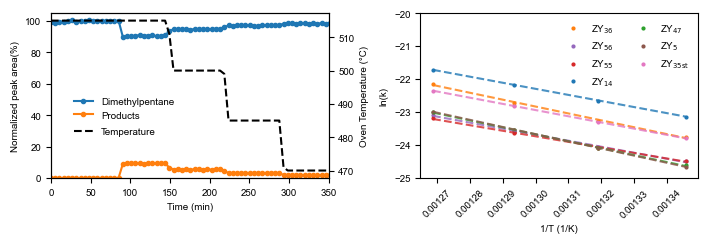

In [6]:
import utils.GC.online_gc_utils as gc

data_gascracking = data_home + '/Gascracking/'
output_dir_gascracking = 'results/DMP_cracking/'
experiments = os.listdir(data_gascracking)
experiments.sort(key=lambda x: int(x[-2:])) #sort by catalyst number

fig, axs = plt.subplots(1,2,figsize=(18/2.54,6.22/2.54))
ax=axs[0]
ax2 = ax.twinx()
ax_arrhenius = axs[1]
outputs_gascracking = []

def process_gas_cracking(selector,ax=ax,ax_arrhenius=ax_arrhenius,ax2=ax2):
    data_dir = data_gascracking + experiments[selector] + '/'
    chromatogram_list = os.listdir(data_dir+'chromatograms/')
    meta_frame = pd.read_csv(data_dir + 'meta.csv', sep = ',', index_col = 0) #metafile contains the wet weight of the catalyst used


    #parsing log file and metadata-----------------------------------------

    #The temperature and status of valves is logged in a labview log file
    try:
        log_file_name = [s for s in os.listdir(data_dir) if "Log" in s and ".txt" in s][0]
    except:
        raise ValueError('No log file found for catalyst')
    Log = gc.parse_log(data_dir + log_file_name) #

    catname = meta_frame.index[0]
    cat_mass_wet = meta_frame['wet_mass'][0]
    # The rate constant is later determined in units of dry catalyst weight. The watercontent of the catalyst is determined by TGA.
    # The tga file is in the data dir. The water content is the difference in weight between RT and 800°C.
    try:
        water_content = gc.get_water_content(data_dir + [s for s in os.listdir(data_dir) if 'watercontent' in s][0])
    except:
        raise ValueError('No water content found for catalyst')
    cat_mass_dry = cat_mass_wet *(1-water_content)



    #specifying peaks we want to integrate-----------------------------------------

    # The GC has 3 columns (2 FID, 1 TCD detectors). DMP is detected on the first channel, as its signal at high retention times in channel 2 proved too unreliable.
    Peaks_channel1 = [['DMP_L',[17.7,24]],['Rest',[14,17.7]]]

    Peaks_channel2 = [['Pentane',[54,58]], # this was used for calibration, not necessary here
            ['DMP',[255,280]],
            ['Butane', [34,38]],
            ['Propane', [29,34]],
            ['Ethane', [27.87,29.26]],
            ['Methane', [27.5,27.87]],
            ['ALL_products',[26,150]]]

    Peaks_TCD = [['N2',[20,26]],['H2',[16,19]]]

    Peaknames = gc.get_peaknames(Peaks_channel1,Peaks_channel2,Peaks_TCD)
    Peaknames.append('Timestamp')

    #Processing the chromatograms-----------------------------------------

    #The chromatograms of the three channels are read from a single ASCII file for each injection.
    #The baseline correction simply substracts the mean signal in a chromatogram region with no peaks.
    Paths = gc.get_chrom_paths(data_dir,chromatogram_list)
    Integral_Frame = gc.process_chromatograms(Paths,Peaknames,Peaks_channel2,Peaks_TCD,Peaks_channel1) 
    Integral_Frame = gc.get_temp_and_valves(Integral_Frame,Log) 

    Integral_Frame = Integral_Frame[Integral_Frame['v10-bubbler'] == 1] # skip the heatup phase, experiemnts starts when the flow over the bubbler is started
    Integral_Frame['Timestamp_0'] = Integral_Frame['Timestamp'] - Integral_Frame['Timestamp'].iloc[0] 

    #convert timedelta to minutes
    Integral_Frame['Timestamp_0']=Integral_Frame['Timestamp_0'].apply(lambda x: x.total_seconds()/60)
    #drop the last row
    Integral_Frame = Integral_Frame.iloc[:-1,:]

    #The conversion is ging to be determined by a relative peak area.
    #The mean peak area of the last 5 chromatograms before switching from bypass to reactor is taken as a starting concentration (or 'normalization foctor')
    no_chromatograms_norm = 5
    idx = Integral_Frame[Integral_Frame['v11-reactor'] == 'bypass'].index
    idx_norm = idx[-(no_chromatograms_norm+1):-1]
    A0_DMP = Integral_Frame['DMP_L'][idx_norm].mean()

    #Estimation of the DMP partial pressure and molar flow.-----------------------------------------
    vol_pct = A0_DMP*2.6752713006562702e-09/7 # calibration factor from calibration on september 1st 2023. Returns the volume% of DMP. C1-C5 mixuture was used in calibration, so this is only an estimate.
    partial_pressure_kpa = vol_pct*10**5/1000 # assuming 10^5 pa normal pressure
    volumertric_flow = (50+1.5)/60*10**(-6) # 1.5 ml/min N2 is going through the bubbler, and then diluted by 50ml/min He,  in m3/s TODO: automate getting these numbers
    temp_heattracing = 125 + 273.13 # The tempearature at which the gas enters the GC
    molar_folow = vol_pct*10**5*volumertric_flow/(8.314*temp_heattracing) 


    #The N2 flow to the bubbler fluctuates slightly. The signal thefore needs to be corrected by N2 as internal standard
    Integral_Frame['N2corr']= Integral_Frame['N2']/Integral_Frame.loc[idx_norm]['N2'].mean()
    #The relative amount of DMP left and the amount of products formed is calculated as relative peak area.
    Integral_Frame['DMP_norm'] = Integral_Frame['DMP_L']/A0_DMP*100/Integral_Frame['N2corr']
    Integral_Frame['Products_norm'] = Integral_Frame['Rest']/A0_DMP*100/Integral_Frame['N2corr'] 

    #plotting yield over time
    if selector == 5: # select which experiment is plotted
        print(catname)
        ax.plot(Integral_Frame['Timestamp_0'],Integral_Frame['DMP_norm'],label='Dimethylpentane',marker = 'o',markersize=3)
        ax.plot(Integral_Frame['Timestamp_0'],Integral_Frame['Products_norm'],label='Products',marker = 'o',markersize=3, color = 'C1')
        # #uncomment for carbon balance
        # ax.plot(Integral_Frame['Timestamp_0'],Integral_Frame['DMP_norm']+Integral_Frame['Products_norm'],label='Carbon balance',marker = 'o',markersize=3, color = 'C2') 
        ax2.plot(Integral_Frame['Timestamp_0'], Integral_Frame['Temperature'], label='Temperature',color='black', linestyle = '--')


    # Making an Arrhenius plot-----------------------------------------
    # get 5 most common temperatures in the experiment
    temps = Integral_Frame['Temperature'].value_counts().index[0:4]
    #arrhenius frame is a copy of the integral frame but only where conversion is greater than 0.5%. This throws out the bypass period.
    Arrhenius_integrals = Integral_Frame[Integral_Frame['Products_norm']>0.5].copy()

    # 1-X and the product yield are calculated as means at a specific temperature. The first 2 and last 2 chromatograms are skipped. If carbon balance is good, both ways are almost equal.
    DMP_left_list = [gc.get_mean_DMP(Arrhenius_integrals, temps[i]) for i in range(0,len(temps))]
    product_yields = [gc.get_mean_product(Arrhenius_integrals, temps[i]) for i in range(0,len(temps))]

    Arrhenius_frame = pd.DataFrame({'Temperature(K)':temps+273.13,'DMP_norm':DMP_left_list,'Product_yield':product_yields})

    #due to slight temperature fluctuations in the oil bath over the 5h experiment, the mass balance deviates slightly from 100%.
    #As it is not consistently decreasing, it is not due to coke formation, and is simply corrected for.
    Arrhenius_frame['deviation from 100%'] = Arrhenius_frame['DMP_norm']+Arrhenius_frame['Product_yield'] 

    Arrhenius_frame['1/T'] = 1/Arrhenius_frame['Temperature(K)']
    Arrhenius_frame['ln(k)_conversion'] = np.log(-np.log(Arrhenius_frame['DMP_norm']/Arrhenius_frame['deviation from 100%'])/cat_mass_dry*molar_folow) # in mol of DMP and and milligram of catalyst
    Arrhenius_frame['ln(k)_product'] = np.log(-np.log(1-Arrhenius_frame['Product_yield']/Arrhenius_frame['deviation from 100%'])/cat_mass_dry*molar_folow)

    #plotting-----------------------------------------
    ax_arrhenius.scatter(Arrhenius_frame['1/T'],Arrhenius_frame['ln(k)_product'],marker='o',label= dbq.get_catname(catname), color = dbq.read_db(catname,'plotcolor'),s=4)

    ax_arrhenius.set_xlabel(r'1/T (1/K)')
    for tick in ax_arrhenius.get_xticklabels():
        tick.set_rotation(45)
    ax_arrhenius.set_ylabel('ln(k)')

    #Arrhenius fit
    def lin(x,a,b):
        return a*x+b
    
    popt, pcov = curve_fit(lin, Arrhenius_frame['1/T'],Arrhenius_frame['ln(k)_product']) #pcov iis going to be used later for compensation plot

    Ts = np.linspace(min(Arrhenius_frame['1/T']),max(Arrhenius_frame['1/T']),100)
    # ax_arrhenius.annotate('R$^2$ = ' + str(round(r_value**2,3)), xy=(0.5, 0.55), xycoords='axes fraction')
    slope = popt[0]
    std_err = np.sqrt(np.diag(pcov))[0]
    intercept = popt[1]
    intercept_stderr = np.sqrt(np.diag(pcov))[1]

    ax_arrhenius.plot(Ts,slope*Ts+intercept,linestyle='--',color = dbq.read_db(catname,'plotcolor'),alpha=0.8)

    Ea = slope*-8.314/1000
    Ea_error = std_err*8.314/1000

    lnA = intercept
    A = np.exp(intercept)

    output_dict = {'catcode':catname,'Ea':Ea,'Ea_error':Ea_error,'lnA':lnA,'A':A,'pcov':pcov}


    dbq.write_db(catname,'Ea_DMP_kjmol',Ea)
    dbq.write_db(catname,'Ea_DMP_kjmol_error',Ea_error)
    dbq.write_db(catname,'lnA_DMP',lnA)
    dbq.write_db(catname,'lnA_DMP_error',intercept_stderr)
    dbq.write_db(catname,'k515',np.exp(Arrhenius_frame['ln(k)_product'].max()))
    return output_dict, Arrhenius_frame

selectors = [0,1,3,4,5,6,7]
for selector in selectors:
    output_gascracking,Arrhenius_frame = process_gas_cracking(selector,ax=ax,ax_arrhenius=ax_arrhenius,ax2=ax2)
    outputs_gascracking.append(output_gascracking)
    #save Arrhenius frame as csv
    Arrhenius_frame.to_csv(output_dir_gascracking + output_gascracking['catcode']+ '_Arrhenius_frame'+'.csv')



ax.set_xlabel('Time (min)')
ax.set_ylabel('Normalized peak area(%)')
ax2.set_ylabel('Oven Temperature (°C)')
ax.set_ylim(0,105)
ax.set_xlim(0,350)

ax.legend(frameon=False,loc='lower left',bbox_to_anchor=(0.05,0.3))
ax2.legend(frameon=False,loc='lower left',bbox_to_anchor=(0.05,0.2))
ax_arrhenius.legend(frameon=False,loc='upper right',ncol=2)
ax_arrhenius.set_ylim(-25,-20)
plt.tight_layout()
plt.savefig(fig_dir + '/DMP_cracking.svg',transparent=True,bbox_inches='tight')
plt.show()


##### Ramped TGA
PP of low molecular weight was obtained from Sigma-Aldrich (Product No. 428116). The reader is advised that the molecular weight of this product varies between batches and is generally higher than labeled. For TGA experiments, the plastic was ballmilled under N<sub>2</sub> atmosphere into a powder to facilitate weight-in. 2 g of PP were milled on a Retsch MM500 vario mixer mill for 1 h at 30 Hz under N<sub>2</sub> atmosphere using a 25 ml tungsten carbide jar (Retsch) and 5 ZrO<sub>2</sub> grinding spheres (Retsch, 10 mm diameter). The molecular weight was characterized by size exclusion chromatography (Mw = 27,000 g/mol, $M_w/M_n$ = 2.5). The zeolite (pelletized, crushed and sieved to 150 µm – 212 µm, 0.1-10 mg) was added to a ceramic TGA crucible, and polymer powder (5±0.2 mg) was added on top. The mixture was then heated to 130 °C at 5°C/min and held for 20 minutes under N<sub>2</sub> atmosphere to remove most of the water adsorbed on the zeolite using a PerkinElmer TGA 8000. For ramped experiments, the temperature was ramped to 600 °C at 5 °C/min under N<sub>2</sub> to crack the plastic, then cooled to 50 °C, and subsequently heated to 800 °C at 20 °C/min to 800 °C to burn off coke deposits. Mass of the catalyst was determined as the weight after the burn-off step, while the mass of the polymer was determined as the difference between weight after drying and the catalyst weight.

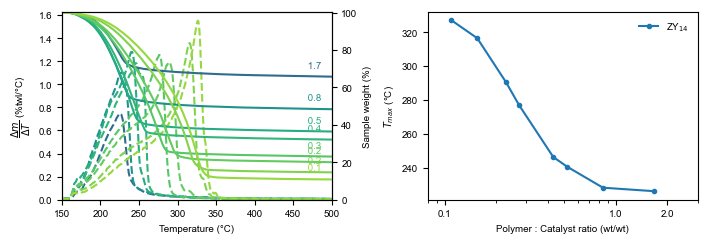

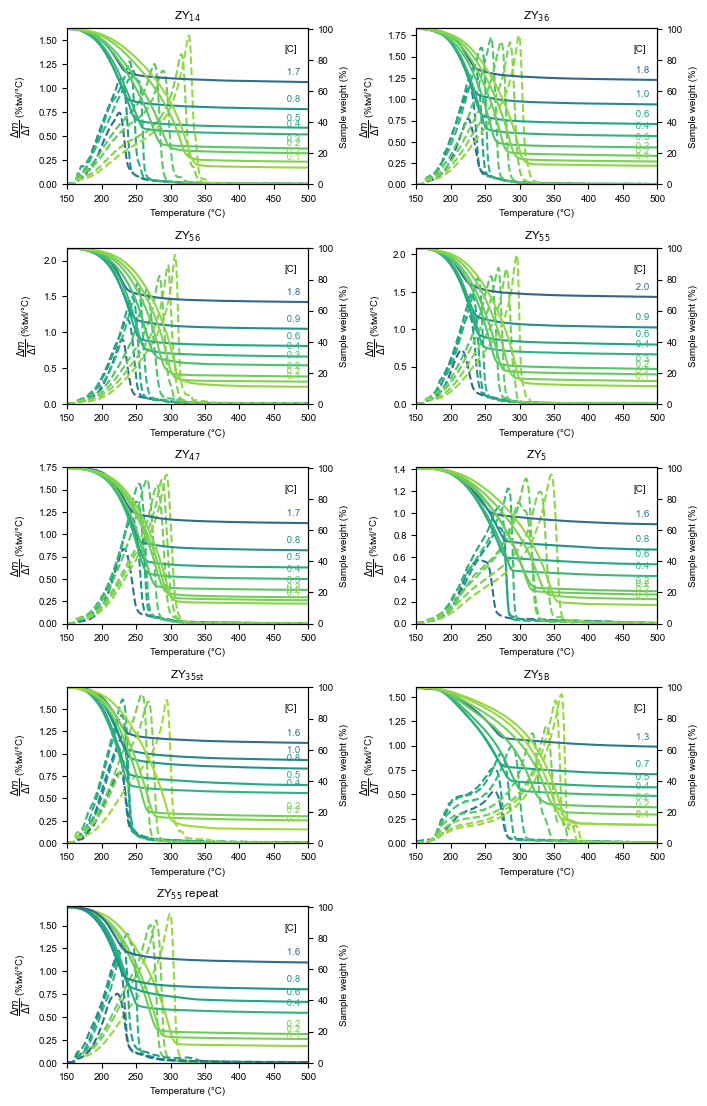

In [7]:
%matplotlib inline
from utils.misc.plot_params import *
import os
TGA_ramped_dir = data_home + '/TGA/Ramped'
output_directory = result_dir + '/TGA/outputs_ramped'

exp_list = os.listdir(TGA_ramped_dir)
fig, axs = plt.subplots(1,2,figsize=(18/2.54,6.22/2.54),layout='tight')
ax=axs[0]
ax2 = ax.twinx()

figSI, axSI = plt.subplots(5,2,figsize=(18/2.54,28.125/2.54))
axSI2_list = []
for i in range(9):
    axSI2_list.append(axSI[i//2,(i+2)%2].twinx())

for i in enumerate(exp_list):
    exp_name = exp_list[i[0]]
    exp_directory = os.path.join(TGA_ramped_dir,exp_name)
    TGA_filenames = os.listdir(exp_directory)
    TGA_files = [os.path.join(exp_directory, file) for file in os.listdir(exp_directory) if file.endswith('.txt')]
    Results = []
    for file in TGA_files:
        tga_exp = tga.parse_txt(file,type = 'pyro') # parses a ASCII TGA output file with multiple stages
        tga_exp.Tmax =tga.calc_Tmax(tga_exp,stage='cracking') #Tmax is the temperature of fastest decomposition rate
        tga_exp.T50 =tga.calc_T50(tga_exp,stage='cracking') # Temperature at which 50% of the plastic is converted to gas
        experiment_results = [os.path.basename(file),tga_exp.m_poly(),tga_exp.m_cat(),tga_exp.coke_yield(),tga_exp.P_C_ratio(),tga_exp.Tmax,tga_exp.T50]
        Results.append(experiment_results)

        #plotting for one of the files
        def plot_TGA_profiles(tga_exp,ax,ax2):
            plot_cl =tga.get_color(tga_exp.pct_loss())
            ax.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['DTGA_twl']*100,'--',color=plot_cl,label = 'cracking')
            ax2.plot(tga_exp.cracking()['Sample Temp.'],tga_exp.cracking()['rel_weight_twl']*100,color=plot_cl)
            # ax.annotate('{:3.0f}'.format(tga_exp.Tmax)+ '$\, \degree $C',xy=(tga_exp.Tmax,tga_exp.cracking()['DTGA_twl'].max()*100),color=plot_cl) #uncomment to show Tmax on the plot
            ax2.annotate('{:4.1f}'.format(1/tga_exp.P_C_ratio()),xy=(465,(tga_exp.cracking()['rel_weight_twl'].min()*100+5)),color=plot_cl)

        if i[0] ==0:
            plot_TGA_profiles(tga_exp,ax,ax2)
        
        plot_TGA_profiles(tga_exp,axSI[i[0]//2,(i[0]+2)%2],axSI2_list[i[0]])

    if i[0] == 8:
        axSI[i[0]//2,(i[0]+2)%2].set_title(dbq.get_catname(exp_name[-3:])+' '+'repeat')
    else:
        axSI[i[0]//2,(i[0]+2)%2].set_title(dbq.get_catname(exp_name[-3:]))
        
    axSI[i[0]//2,(i[0]+2)%2].set_ylim(0,)
    axSI[i[0]//2,(i[0]+2)%2].set_xlim(150,500)
    axSI[i[0]//2,(i[0]+2)%2].set_xlabel('Temperature (°C)')
    axSI[i[0]//2,(i[0]+2)%2].set_ylabel(r'$\dfrac{\Delta m}{\Delta T}$ (%twl/°C)')
    axSI2_list[i[0]].set_ylabel('Sample weight (%)')
    axSI2_list[i[0]].set_ylim(0,100.5)
    axSI2_list[i[0]].annotate('[C]',xy=(465,85),color='black') 
    # axSI[i[0]//2,(i[0]+2)%2].legend(frameon=False,loc='upper right')
    # axSI2_list[i[0]].legend(frameon=False,loc='upper left')

    Result_Frame = pd.DataFrame(Results,columns = ['Filename','m_polymer','m_cat','coke_yield','P/C ratio','Tmax','T50'])
    Result_Frame.to_csv(os.path.join(output_directory,'Results_'+exp_name+'.csv'))
    
# plotting    
ax2.set_ylim(0,100.5)
ax2.set_ylim(0,)
ax.set_ylim(0,)
ax.set_xlim(150,500)
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel(r'$\dfrac{\Delta m}{\Delta T}$ (%twl/°C)')
ax2.set_ylabel('Sample weight (%)')
axSI[4,1].remove()

### plotting PC vs Tmax
results_dir = result_dir + '/TGA/outputs_ramped'
result_paths = os.listdir(results_dir)
ax1 = axs[1]
for i in enumerate(result_paths):
    if i[0]==0:
        result_iso_frame = pd.read_csv(os.path.join(results_dir,i[1]))
        #sort by Tmax
        result_iso_frame = result_iso_frame.sort_values(by='P/C ratio')
        catcode= i[1][-7:-4]
        catname = dbq.get_catname(catcode)
        ax1.plot(1/result_iso_frame['P/C ratio'],result_iso_frame['Tmax'],'o-',label = catname,markersize=3,color=dbq.read_db(catcode,'plotcolor'))

ticks1 = [0.1, 1,2]
ax1.set_xscale('log')
ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xlim(0.08,3)
ax1.set_xlabel('Catalyst loading (wt/wt)')

ax1.set_xlabel('Polymer : Catalyst ratio (wt/wt)')
ax1.set_ylabel('$T_{max}$ (°C)')
ax1.legend(frameon=False, loc='upper right')

plt.tight_layout()
fig.savefig(fig_dir + '/TGA_ramped.svg',transparent=True,bbox_inches='tight')
figSI.savefig(fig_dir + '/SI/TGA_ramped_SI.svg',transparent=True,bbox_inches='tight')
plt.show()

Plotting all $T_{max}$ vs catalyst loading profiles:

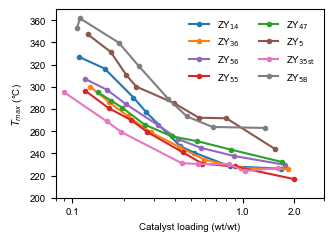

In [8]:
results_dir = r'results\TGA\outputs_ramped'
result_paths = os.listdir(results_dir)
fig, ax1 = plt.subplots()
for i in enumerate(result_paths):
    if i[0] in [0,1,2,3,4,5,6,7]:
        result_iso_frame = pd.read_csv(os.path.join(results_dir,i[1]))
        #sort by Tmax
        result_iso_frame = result_iso_frame.sort_values(by='P/C ratio')
        catcode= i[1][-7:-4]
        ax1.plot(1/result_iso_frame['P/C ratio'],result_iso_frame['Tmax'],'o-',label = dbq.get_catname(catcode),markersize=3,color=dbq.read_db(catcode,'plotcolor'))


ax1.set_xscale('log', base =10)


ax1.set_ylim(200,370)
ticks1 = [0.1, 1,2]

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xlim(0.08,3)

ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('$T_{max}$ (°C)')
ax1.legend(frameon=False, loc='upper right',ncol=2)
plt.savefig(fig_dir +'/SI/'+ 'All_ramped_tga.svg',transparent=True,bbox_inches='tight')
plt.show()
plt.show()

To show the relability of the measurements, the experiment for ZY<sub>55</sub> was repeated.

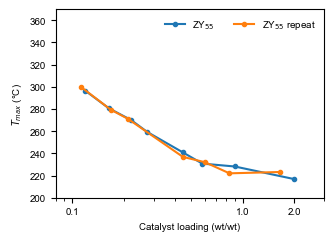

In [9]:
results_dir = r'results\TGA\outputs_ramped'
result_paths = os.listdir(results_dir)
fig, ax1 = plt.subplots()
for i in enumerate(result_paths):
    if i[0] in [3,8]:
        result_iso_frame = pd.read_csv(os.path.join(results_dir,i[1]))
        #sort by Tmax
        result_iso_frame = result_iso_frame.sort_values(by='P/C ratio')
        catcode= i[1][-7:-4]
        if i[0] ==8:
            label = dbq.get_catname(catcode) + ' '+'repeat'
        else:
            label = dbq.get_catname(catcode)
        ax1.plot(1/result_iso_frame['P/C ratio'],result_iso_frame['Tmax'],'o-',label = label,markersize=3)
\
ax1.set_xscale('log', base =10)

ax1.set_ylim(200,370)
ticks1 = [0.1, 1,2]

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xlim(0.08,3)

ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('$T_{max}$ (°C)')
ax1.legend(frameon=False, loc='upper right',ncol=2)
plt.savefig(fig_dir +'/SI/'+ 'repro_ramped.svg',transparent=True,bbox_inches='tight')
plt.show()
plt.show()

Plotting coke yield as a function of catalyst loading.

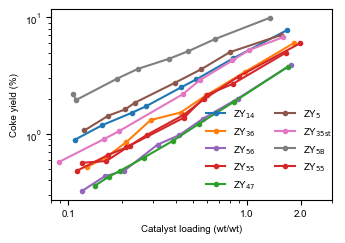

In [10]:
# SI figure: coke yield
results_dir = r'results\TGA\outputs_ramped'
result_paths = os.listdir(results_dir)
fig, ax1 = plt.subplots()
for i in enumerate(result_paths):
    result_iso_frame = pd.read_csv(os.path.join(results_dir,i[1]))
    #sort by Tmax
    result_iso_frame = result_iso_frame.sort_values(by='P/C ratio')
    catcode= i[1][-7:-4]
    ax1.plot(1/result_iso_frame['P/C ratio'],result_iso_frame['coke_yield']*100,'o-',label = dbq.get_catname(catcode),markersize=3,color=dbq.read_db(catcode,'plotcolor'))


ticks1 = [0.1, 1,2]
ax1.set_xscale('log')
ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xlim(0.08,3)
ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('Coke yield (%)')
ax1.legend(frameon=False, loc='lower right', ncol =2,bbox_to_anchor=(1.03,0))
ax1.set_yscale('log')
ax_1b = ax1
plt.tight_layout()
plt.savefig(fig_dir +'/SI/'+ 'cokeyield.svg',transparent=True,bbox_inches='tight')
plt.show()

##### Acidity Characterization: Py-IR and TTBP IR processing

Bulk and external acidity were characterized by infrared spectroscopy of adsorbed pyridine and tri-tert-butyl pyridine (TTBP, Sigma Aldrich), respectively using a custom setup (see SI fig.) Self supported zeolite pellets (13 mm diameter, pressed at 2 tons) were dried at 500 °C for 1 h under high vacuum (10-5 mbar). Pyridine was adsorbed at a pressure of 7-10 mbar for 1 h at 150 °C, with saturation confirmed spectroscopically. Physisorbed species were removed at 150 °C under high vacuum for 30 min. TTBP was adsorbed form the gas phase using a Schlenk flask heated to 80 °C at 0.3 mbar for 30 min, with physiosorbed species were removed under vacuum at 80 °C. The spectrum of the dry zeolite at the appropriate temperature was subtracted. Spectra were acquired ThermoFischer Nicolet spectrometer at 4 cm-1 resolution and averaged over 16 measurements. Spectra were processed making use of the SpectroChemPy51 library. The acid site density $ρ$ was quantified according to Eq. 3, where $A$ is the peak area, $S_P$ the surface area of the pelett, $ε$ the extinction coefficient and $m_P$ the mass of the pelett.
\begin{equation}
    ρ = \frac{A \cdot S_P}{ϵ \cdot m_P}
\end{equation}

For pyridine, and extinction coefficients $ϵ$ of=1.54±0.15 cm/µmol and 1.74±0.1 cm/µmol of the ring vibration of the protonated pyridine and Lewis acid-coordinated pyridine respectively [29] were used, for TTBP, the N-H vibration was quantified, using an extinction coefficient of 5.74 cm/µmol. [30] We note that while the literature extinction coefficient for pyridine was determined gravimetrically,29 it was determined reference to the OH-vibration for TTBP, and we conducted our measurement at higher 80 °C, rather than at 25 °C. For temperature programmed desorption, pyridine was desorbed at 5 °C/min until 500 °C with continues recording of spectra. Here, an additional linear baseline correction between 1564 cm-1 and 1508 cm-1 was applied to the BAS peak. 

###### Pyridine

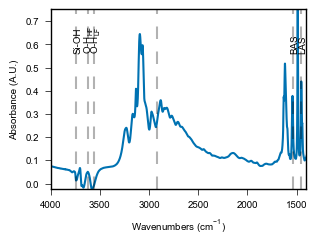

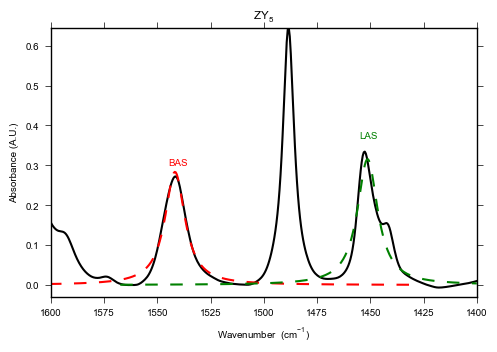

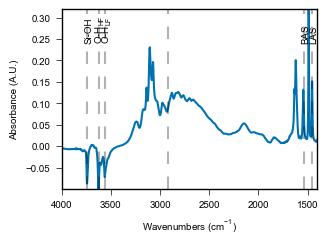

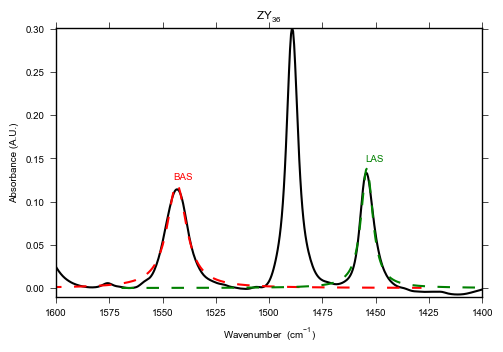

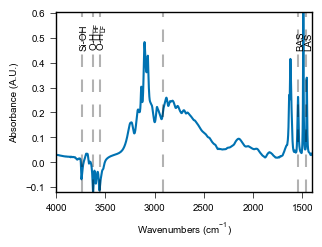

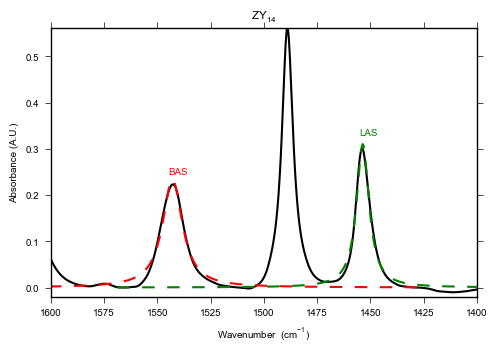

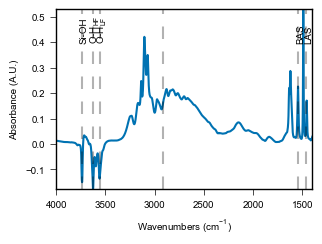

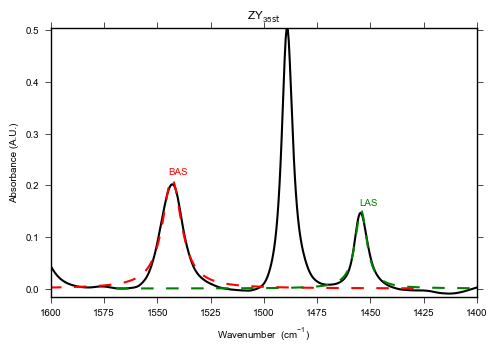

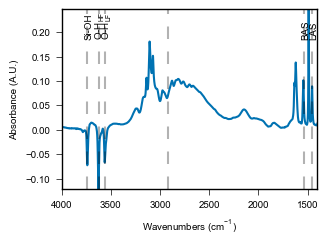

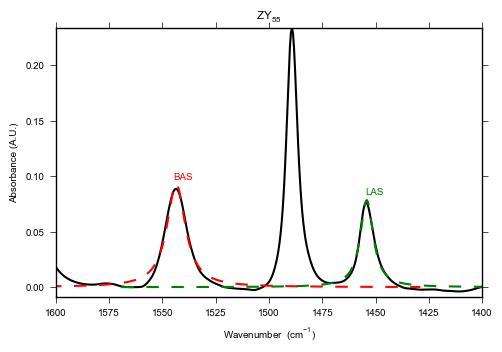

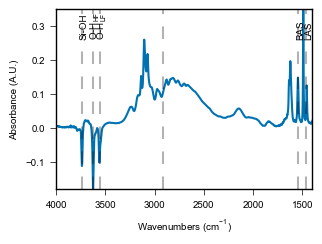

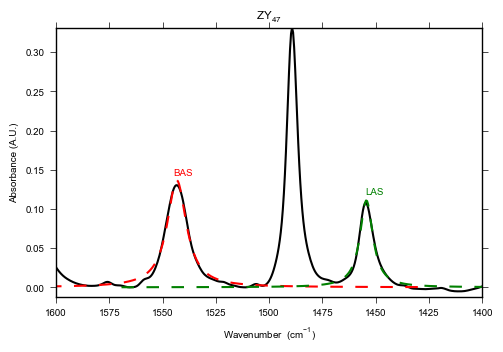

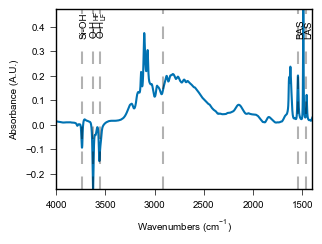

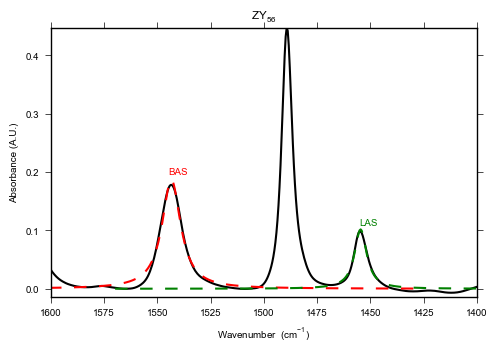

In [11]:
from utils.TGA import TGA_utils as tga
# %matplotlib widget # uncomment to get interactive plots
data_dir_py = data_home + '/IR/Pyridine/'# # list directories
experiments = os.listdir(data_dir_py)
selector = [0,1,2,3,4,5,6]
dosed_spectra_pyridine = []
plot_spectrum = True
for i in selector:
    ### Loading of data----------------------------
    exp_name = experiments[i]
    exp_path = data_dir_py +'/'+ exp_name + '/'
    #the log file is a labview logfile containing most importantly the temperature over the course of the experiment
    log = ir.parse_log(exp_path)

    #the data file is a omnic .spg file containing all the spectra of the experiment. Spectra are recorded in single channel mode
    data_file = exp_path+"/spectra_all//*.SPG"
    scp_ar = ir.scp.read_omnic(data_file)
    #the background is aquired before the actual experiment to allow to look at spectra without the zeolite already substracted
    background = ir.scp.read_omnic(glob.glob(exp_path +'/background'+ '/*.SPA')[0])
    wavenumbers = scp_ar.x.values.magnitude 
    timestamps = ir.get_timestamps(scp_ar) # returns the time of each spectrum
    scp_ar= ir.add_temp(scp_ar,log,timestamps) # the temperature at each timestamp is looked up in in the log file
    data_array = ir.xr_convert(scp_ar,background) # calculates the absorbance and turns the scp array into an xarray

    del scp_ar

    index_lib = ir.get_indices(exp_path,exp_name,save_indices=False,print_indices = False) #looks up a file that contains 'indices' and returns a library with the indices therein
    #the experiment is split into multiple stages using a list of idices.
    #for determination of the indices, plot the absorption at e.g. 1545 cm-1 and the tempearture as a function of the index of the spectra
    #baseline (aquired during cooling down after drying), dosing, desorption, and drying
    data_array_bl, data_array_dose, data_array_desorb, data_array_dry = ir.split_experiment(data_array,index_lib)

    ### Baseline correction----------------------------
    # the spectra of the zeolite at the approriate temperature are substracted for dosing and desorption spectra
    data_array_dose_corr = ir.baseline_substract(data_array_bl,data_array_dose)
    data_array_desorb_corr = ir.baseline_substract(data_array_bl,data_array_desorb)

    if plot_spectrum: # plotting of the infividual spectra
        fig, ax = plt.subplots(figsize=(3.3,3.3/np.sqrt(2)))
        ax.plot(wavenumbers, data_array_dose_corr[-1].values, c='C0')
        ax.set_xlabel('Wavenumbers (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
        ax.set_xlim(4000,1400)
        maximum = max(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        minimum = min(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        ax.set_ylim(minimum, maximum)

        peakpos_other = [[2918,' '],[1538,'BAS'],[1457,'LAS'],[3741,'Si-OH'],[3625, 'O-H$_{HF}$'],[3560, 'O-H$_{LF}$'] ]#
        for i in range(len(peakpos_other)):
            ax.axvline(peakpos_other[i][0], c='k', linestyle='--',alpha=0.3)
            ax.annotate(peakpos_other[i][1], (peakpos_other[i][0]-20,maximum*0.75),rotation=90, va='bottom', ha='center',fontsize=7)


        ax.tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        # plt.title(dbq.get_catname(catname))


    ### Quantification----------------------------
    
    peak_names = ['BAS_Py','LAS_Py']
    extinction_coefficients = [1.54,1.71] #taken from 10.1016/j.jcat.2020.03.003
    colors = ['r','g']
    peak_pos = [1545.0,1455.0]
    pelett_diameter = 13 #mm
    spectrum = data_array_dose_corr[-1] # the last spectrum of the desing part is used in the quantification

    #determining mass of the 
    try:
        tga_file = glob.glob(exp_path + '/tga//*.txt')[0]
        tga_instance = tga.parse_txt(tga_file,type = 'general',calculate_DTGA = False)
        mass_zeolite_dry = tga_instance.get_stage('stage2')['Unsubtracted weight'].min()
    except:
        print('no tga for'+exp_name)
        metafile = pd.read_csv(glob.glob(exp_path + '/meta.txt')[0])
        mass_zeolite_dry = metafile['dryweight'][0]
        print('not using TGA for weight')


    data = spectrum.sel(wavenumber=slice(2000,1400))
    data_mincorr = data - data.sel(wavenumber=slice(1600,1560)).min()
    if plot_spectrum:
        fig, ax = plt.subplots()
        ax.plot(data_mincorr.wavenumber, data_mincorr,c='black')
        ax.set_ylim(min(data_mincorr),max(data_mincorr))
        ax.set_xlim(1600,1400)
        ax.set_xlabel('Wavenumber  (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
        
    for j in range(len(peak_names)):
        area_peak, peak_intensity,fitcurve = ir.fit_integrate_peak(data_mincorr, peak_pos[j], 25, 15, 'lorentzian', plot='multi')
        xdata,ydata =fitcurve.get_data()
        if plot_spectrum:
            ax.plot(xdata,ydata,c=colors[j],linestyle='--')
            ax.annotate(peak_names[j][0:3],(peak_pos[j],peak_intensity*1.1),color=colors[j],)
            
        acid_site_density = area_peak*np.pi*(pelett_diameter/10/2)**2/extinction_coefficients[j]/mass_zeolite_dry*1000 #in µmol/g
        #writing to DB
        catname = exp_name.split('_')[-1][0:3]
        dbq.write_db(catname,peak_names[j],acid_site_density)
    if plot_spectrum:
        plt.title(dbq.get_catname(catname))
        plt.show()

    # TPD processing 
    tpd_frame = ir.get_tpd_BAS(data_array_desorb_corr,mass_zeolite_dry,peakloc=1545.0) #takes a linear baseline around the BAS peak and integrates it, devieds by pellet weight
    #save as csv
    tpd_frame.to_csv(r'results\Py_TPD/'+catname+'_py_TPD.csv')

    #saving the dosed spectrum
    dosed_spectrum_frame = pd.DataFrame({'wavenumber':spectrum.wavenumber.values,'absorbance':spectrum.values, 'absorbance_byweight':spectrum.values/mass_zeolite_dry})
    dosed_spectrum_frame.to_csv(r'results\Py_dosed_spectra/'+catname +'_py_dosed_spectrum_'+'.csv')

    dosed_spectra_pyridine.append([catname, spectrum/mass_zeolite_dry])

###### Pyridine TPD (SI)

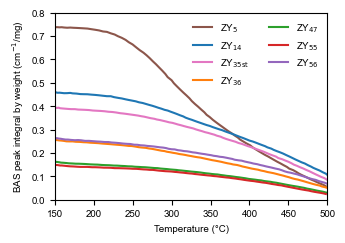

In [12]:
%matplotlib inline
tpd_filepaths = glob.glob(r'results\Py_TPD\*.csv')
plt.rcParams.update(plt.rcParamsDefault)
set_plot_params()

fig, ax = plt.subplots()

tpd_filepaths = sorted(tpd_filepaths,key=lambda x: dbq.read_db(x.split('\\')[-1].split('_')[0][0:3],'SAR_ICP'))

for tpd_path in tpd_filepaths:
    tpd_frame = pd.read_csv(tpd_path)
    catname = tpd_path.split('\\')[-1].split('_')[0]
    ax.plot(tpd_frame['temperature'],tpd_frame['integral_byweight'],label=dbq.get_catname(catname),color=dbq.read_db(catname,'plotcolor'))

    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('BAS peak integral by weight (cm$^{-1}$/mg)')

ax.set_xlim(150,500)
ax.set_ylim(0,0.8)
ax.legend(frameon=False,ncol=2)
plt.tight_layout()
plt.savefig(fig_dir + '/SI/Py_TPD.svg',transparent=True,bbox_inches='tight')
plt.show()

BAS and LAS vibrations for all (SI)

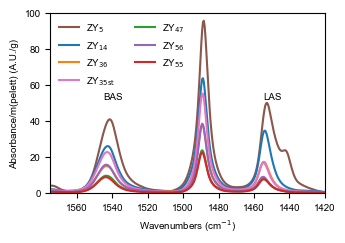

In [13]:
fig, ax = plt.subplots()
plt.rcParams.update(plt.rcParamsDefault)
set_plot_params()
#sort dosed spectra by SAR
dosed_spectra_pyridine.sort(key=lambda x: dbq.read_db(x[0],'Al_cont_mmol_g'),reverse=True)

for i in range(len(dosed_spectra_pyridine)):
    data_blcorr = dosed_spectra_pyridine[i][1] - dosed_spectra_pyridine[i][1].sel(wavenumber=slice(1600,1400)).min()
    if dosed_spectra_pyridine[i][0]!='Z53':
        ax.plot(dosed_spectra_pyridine[i][1].wavenumber, data_blcorr*1000,label = dbq.get_catname(dosed_spectra_pyridine[i][0]),color = dbq.read_db(dosed_spectra_pyridine[i][0],'plotcolor'))
ax.set_xlim(1575,1420)
ax.set_ylim(0, 0.1*1000)
ax.set_xlabel('Wavenumbers (cm$^{-1}$)')
ax.set_ylabel('Absorbance/m(pelett) (A.U./g)')

#annotate with BAS and LAS
ax.annotate('BAS',(1545,52),color='black')
ax.annotate('LAS',(1455,52),color='black')

plt.legend(frameon=False,ncol=2)
plt.tight_layout()
plt.savefig(fig_dir + '/Py_dosed_spectra.svg',transparent=True,bbox_inches='tight')
plt.show()

###### TTBP

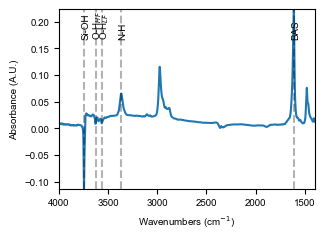

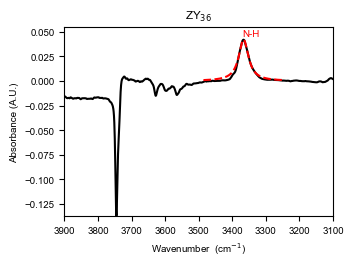

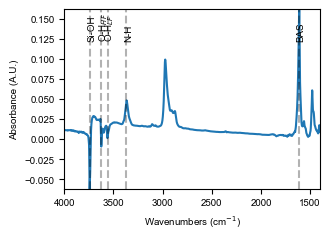

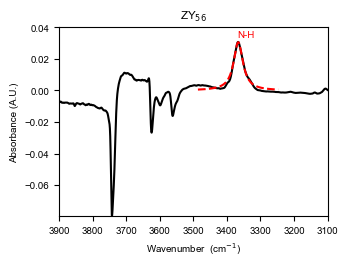

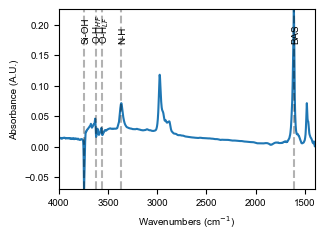

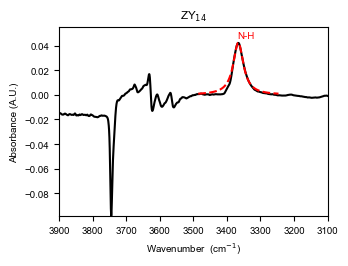

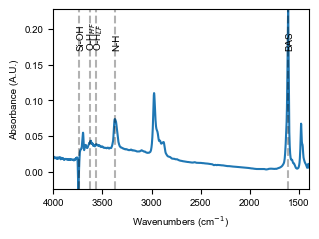

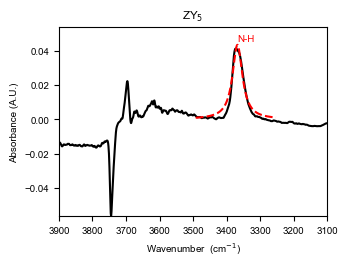

no tga forSR_PI_025_Z03
using manually specified weight


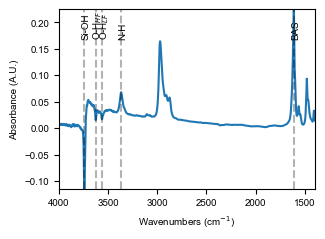

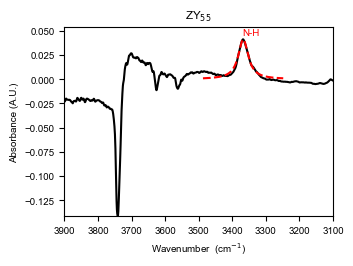

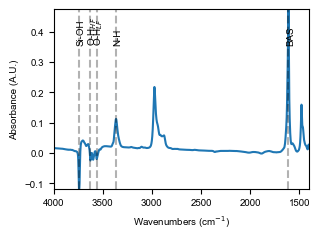

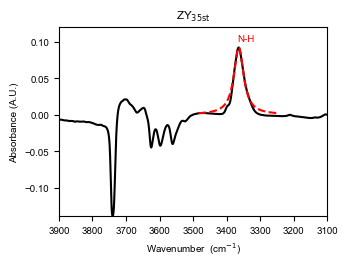

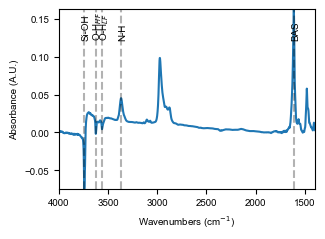

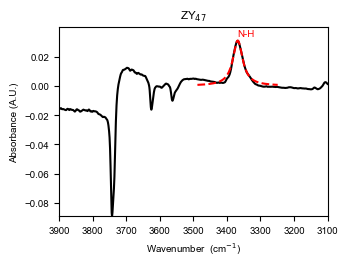

In [14]:
# %matplotlib widget
data_dir_py = data_home + '/IR/TTBP/'# # list directories
experiments = os.listdir(data_dir_py)
selector = [0,1,2,3,4,5,6]
# selector = [0,1]
dosed_spectra_TTBP = []
plot_spectrum = True
for i in selector:
    ### Loading of data----------------------------
    exp_name = experiments[i]
    exp_path = data_dir_py +'/'+ exp_name + '/'
    #the log file is a labview logfile containing most importantly the temperature over the course of the experiment
    log = ir.parse_log(exp_path)

    #the data file is a omnic .spg file containing all the spectra of the experiment. Spectra are recorded in single channel mode
    data_file = exp_path+"/spectra_all//*.SPG"
    scp_ar = ir.scp.read_omnic(data_file)
    #the background is aquired before the actual experiment to allow to look at spectra without the zeolite already substracted
    background = ir.scp.read_omnic(glob.glob(exp_path +'/background'+ '/*.SPA')[0])
    wavenumbers = scp_ar.x.values.magnitude 
    timestamps = ir.get_timestamps(scp_ar) # returns the time of each spectrum
    scp_ar= ir.add_temp(scp_ar,log,timestamps) # the temperature at each timestamp is looked up in in the log file
    data_array = ir.xr_convert(scp_ar,background) # calculates the absorbance and turns the scp array into an xarray
    #drop the scp_ar object to free up memory
    del scp_ar

    index_lib = ir.get_indices(exp_path,exp_name,save_indices=False,print_indices = False) #looks up a file that contains 'indices' and returns a library with the indices therein
    #the experiment is split into multiple stages using a list of idices.
    #for determination of the indices, plot the absorption at e.g. 1545 cm-1 and the tempearture as a function of the index of the spectra
    #baseline (aquired during cooling down after drying), dosing, desorption, and drying
    data_array_bl, data_array_dose, data_array_desorb, data_array_dry = ir.split_experiment(data_array,index_lib)

    ### Baseline correction----------------------------
    # the spectra of the zeolite at the approriate temperature are substracted for dosing and desorption spectra
    data_array_dose_corr = ir.baseline_substract(data_array_bl,data_array_dose)
    data_array_desorb_corr = ir.baseline_substract(data_array_bl,data_array_desorb)

    if plot_spectrum: # plotting of the infividual spectra
        fig, ax = plt.subplots(figsize=(3.3,3.3/np.sqrt(2)))
        ax.plot(wavenumbers, data_array_dose_corr[-1].values, c='C0')
        ax.set_xlabel('Wavenumbers (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
        ax.set_xlim(4000,1400)
        maximum = max(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        minimum = min(ir.get_slice(data_array_dose_corr[-1],4000,1400).values)
        ax.set_ylim(minimum, maximum)

        peakpos_other = [[3369,'N-H'],[1613,'BAS'],[3741,'Si-OH'],[3625, 'O-H$_{HF}$'],[3560, 'O-H$_{LF}$'] ]#1623,1600,1549,1480,1467,1408,1373   [1600,'ring']
        for i in range(len(peakpos_other)):
            ax.axvline(peakpos_other[i][0], c='k', linestyle='--',alpha=0.3)
            ax.annotate(peakpos_other[i][1], (peakpos_other[i][0]-20,maximum*0.75),rotation=90, va='bottom', ha='center',fontsize=7)


        ax.tick_params(direction='out')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')


    ### Quantification----------------------------
    
    peak_names = ['acid sites (TTBP)']
    extinction_coefficients = [5.74] #taken from 10.1016/j.jcat.2020.03.003
    colors = ['r']
    peak_pos = [3369]
    pelett_diameter = 13 #mm
    spectrum = data_array_dose_corr[-1] # the last spectrum of the desing part is used in the quantification

    #determining dry mass of the zeoltie pelett
    try:
        tga_file = glob.glob(exp_path + '/TGA//*.txt')[0]
        tga_instance = tga.parse_txt(tga_file,type = 'general',calculate_DTGA = False)
        mass_zeolite_dry = tga_instance.get_stage(tga_instance.stage_names()[-2])['Unsubtracted weight'].min()
    except:
        print('no tga for'+exp_name)
        metafile = pd.read_csv(glob.glob(exp_path + '/meta.txt')[0])
        mass_zeolite_dry = metafile['dryweight'][0]
        print('using manually specified weight')

    data = spectrum.sel(wavenumber=slice(3900,3100))
    data_mincorr = data - data.sel(wavenumber=slice(3450,3300)).min()
    if plot_spectrum:
        fig, ax = plt.subplots()
        ax.plot(data_mincorr.wavenumber, data_mincorr,c='black')
        ax.set_ylim(min(data_mincorr),max(data_mincorr)*1.3)
        ax.set_xlim(3900,3100)
        ax.set_xlabel('Wavenumber  (cm$^{-1}$)')
        ax.set_ylabel('Absorbance (A.U.)')
    for j in range(len(peak_names)):
        area_peak, peak_intensity,fitcurve = ir.fit_integrate_peak(data_mincorr, peak_pos[j], 50, 20, 'lorentzian', plot='multi')
        xdata,ydata =fitcurve.get_data()
        if plot_spectrum:
            ax.plot(xdata,ydata,c=colors[j],linestyle='--')
            ax.annotate('N-H',(peak_pos[j],peak_intensity*1.1),color=colors[j],)
            
        acid_site_density = area_peak*np.pi*(pelett_diameter/10/2)**2/extinction_coefficients[j]/mass_zeolite_dry*1000 #in µmol/g
        #writing to DB
        catname = exp_name.split('_')[-1][0:3]
        dbq.write_db(catname,peak_names[j],acid_site_density)
    plt.title(dbq.get_catname(catname))
    plt.show()

    # # TPD processing
    # tpd_frame = ir.get_tpd_BAS(data_array_desorb,mass_zeolite_dry,peakloc=1545.0) #takes a linear baseline around the BAS peak and integrates it, devieds by pellet weight
    # #save as csv
    # tpd_frame.to_csv(r'results\Py_TPD/'+catname+'_py_TPD.csv')

    #saving the dosed spectrum
    dosed_spectrum_frame = pd.DataFrame({'wavenumber':spectrum.wavenumber.values,'absorbance':spectrum.values, 'absorbance_byweight':spectrum.values/mass_zeolite_dry})
    dosed_spectrum_frame.to_csv(r'results\TTBP_dosed_spectra/'+catname +'_TTBP_dosed_spectrum'+'.csv')

    dosed_spectra_TTBP.append([catname, spectrum/mass_zeolite_dry])

##### Fig. 1

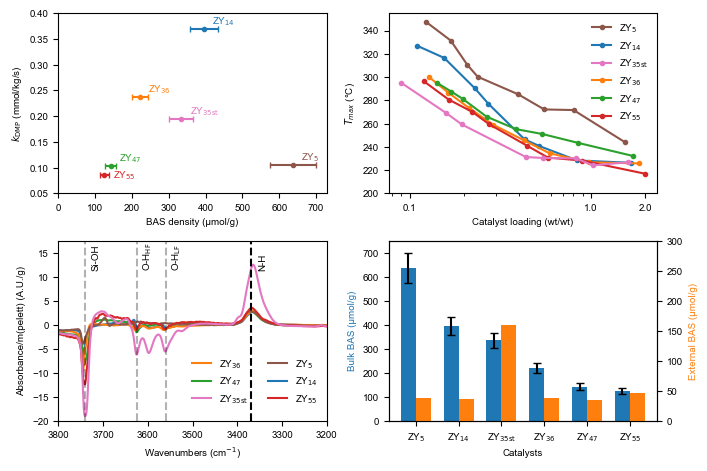

In [15]:
# %matplotlib widget
fig, axs = plt.subplots(2,2,figsize=(18/2.54,12/2.54))
db_path =  'C:/Users/Rejma001/surfdrive2/python_projects/Acidity_paper/Catalyst_database.csv'
cat_db = pd.read_csv(db_path, index_col = 0)
#return frame where 'acid sites (pyridine-Zoe)' is not empty
cat_db_bulk_acidity = cat_db[cat_db['BAS_Py'].notnull()]
k_DMP = [dbq.read_db(catcode,'k515')*1_000_000_000 for catcode in cat_db_bulk_acidity.index]

ax=axs[0,0]

for i in range(len(cat_db_bulk_acidity.index)):
    if cat_db_bulk_acidity.index[i] != 'Z02':
        ax.errorbar(cat_db_bulk_acidity.iloc[i]['BAS_Py'],k_DMP[i],xerr=cat_db_bulk_acidity.iloc[i]['BAS_Py']*0.15/1.54,marker='o',color=cat_db_bulk_acidity.iloc[i]['plotcolor'],markersize=3,capsize=2)
        if cat_db_bulk_acidity.index[i] == 'Z03':
            ax.annotate(dbq.get_catname(cat_db_bulk_acidity.index[i]),(cat_db_bulk_acidity.iloc[i]['BAS_Py']+22,k_DMP[i]-0.005), color=cat_db_bulk_acidity.iloc[i]['plotcolor'])
        else:
            ax.annotate(dbq.get_catname(cat_db_bulk_acidity.index[i]),(cat_db_bulk_acidity.iloc[i]['BAS_Py']+22,k_DMP[i]+0.01), color=cat_db_bulk_acidity.iloc[i]['plotcolor'])

# for i in range(len(cat_db_bulk_acidity.index)):
#     ax.plot(cat_db_bulk_acidity.iloc[i]['BAS_Py'],k_DMP[i],'o',color=cat_db_bulk_acidity.iloc[i]['plotcolor'],markersize=3)

ax.set_xlabel('BAS density (µmol/g)')
ax.set_ylabel('$k_\mathrm{DMP}$ (mmol/kg/s)')
ax.set_xlim(0,)
ax.set_ylim(0.05,0.4)
# savepath = fig_dir + '\k_DMP_vs_BAS.svg'
# plt.savefig(savepath,transparent=True,bbox_inches='tight')
# plt.show()


### 1 B ###
results_dir = r'results\TGA\outputs_ramped'
result_paths = os.listdir(results_dir)
ax1 = axs[0,1]
for i in enumerate(result_paths):
    if i[0] in [0,1,3,4,5,6]:
        result_iso_frame = pd.read_csv(os.path.join(results_dir,i[1]))
        #sort by Tmax
        result_iso_frame = result_iso_frame.sort_values(by='P/C ratio')
        catcode= i[1][-7:-4]
        catname = dbq.get_catname(catcode)
        ax1.plot(1/result_iso_frame['P/C ratio'],result_iso_frame['Tmax'],'o-',label = catname,markersize=3,color=dbq.read_db(catcode,'plotcolor'))


ax1.set_xscale('log')
ax1.set_ylim(200,355)
ticks1 = [0.1, 1,2]

ax1.set_xticks(ticks1)
ax1.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax1.set_xlabel('Catalyst loading (wt/wt)')
ax1.set_ylabel('$T_{max}$ (°C)')
# ax1.legend(frameon=False, loc='upper right')

handles, labels = ax1.get_legend_handles_labels()
# order = [2,1,5,3,0,4]
order = [4,0,5,1,3,2]
ax1.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc='upper right')


plt.tight_layout()

### 1C####
ax_1c = axs[1,0]


dosed_spectra_TTBP.sort(key=lambda x: dbq.read_db(x[0],'acid sites (TTBP)'),reverse=False)

for i in range(len(dosed_spectra_TTBP)):
    data_blcorr = dosed_spectra_TTBP[i][1] - dosed_spectra_TTBP[i][1].sel(wavenumber=slice(3450,3300)).min()
    if dosed_spectra_TTBP[i][0]!='Z02':
        ax_1c.plot(dosed_spectra_TTBP[i][1].wavenumber, data_blcorr*1000,label = dbq.get_catname(dosed_spectra_TTBP[i][0]),color = dbq.read_db(dosed_spectra_TTBP[i][0],'plotcolor'))
ax_1c.set_xlim(3800,3200)
ax_1c.set_ylim(-0.020*1000, max(data_blcorr.sel(wavenumber=slice(3800,3300)).values,)*1000*1.4)
ax_1c.set_xlabel('Wavenumbers (cm$^{-1}$)')
ax_1c.set_ylabel('Absorbance/m(pelett) (A.U./g)')

peakpos_other = [[2974,r'$\nu_{CH3,as}$'],[2918,' '],[1623,'ring'],[3741,'Si-OH'],[3625, r'O-H$_{\mathrm{HF}}$'],[3560, r'O-H$_{\mathrm{LF}}$'] ]#1623,1600,1549,1480,1467,1408,1373   [1600,'ring']
for i in range(len(peakpos_other)):
    ax_1c.axvline(peakpos_other[i][0], c='k', linestyle='--',alpha=0.3)
    ax_1c.annotate(peakpos_other[i][1], (peakpos_other[i][0]-25,max(data_blcorr.sel(wavenumber=slice(3800,3300)).values,)*0.9*1000),rotation=90, va='bottom', ha='center')

peakpos_cation = [3369, 1613] #cations
annot_cations = [r'N-H','ring$^+$' ]
for line in peakpos_cation:
    ax_1c.axvline(line, c='k', linestyle='--')
for i, txt in enumerate(annot_cations):
    ax_1c.annotate(txt, (peakpos_cation[i]-25,max(data_blcorr.sel(wavenumber=slice(3800,3300)).values,)*0.9*1000),rotation=90, va='bottom', ha='center')

# ax_1c.legend(frameon=False,loc='upper right')

#sort the legend
handles, labels = ax_1c.get_legend_handles_labels()
order = [2,1,5,3,0,4]
ax_1c.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False,loc='upper right',bbox_to_anchor=(1.0,0.4),ncol=2)

### 1D ###

cat_db_bulk_acidity = cat_db_bulk_acidity[cat_db_bulk_acidity.index!='Z02']
cat_db_bulk_acidity = cat_db_bulk_acidity.sort_values(by = 'BAS_Py', ascending = False)
catalysts = cat_db_bulk_acidity.index
cat_names = [dbq.get_catname(i) for i in catalysts]
property1 = cat_db_bulk_acidity['BAS_Py']
property2 = cat_db_bulk_acidity['acid sites (TTBP)']

# Set up figure and axis
ax1_1d = axs[1,1]
bar_width = 0.35
bar1 = ax1_1d.bar(np.arange(len(catalysts)), property1, bar_width,yerr=property1*0.15/1.54,capsize=3, label='Bulk Acidity (Pyrdine)', color='C0')
bar2 = ax1_1d.bar(np.arange(len(catalysts)) + bar_width, property2, bar_width, label='External Acidity (TTBP)', color='C1')

ax2 = ax1_1d.twinx()

bar2 = ax2.bar(np.arange(len(catalysts)) + bar_width, property2, bar_width, label='Property 2', color='C1')

ax1_1d.set_ylim(0, 750)
ax1_1d.set_xlabel('Catalysts')
ax1_1d.set_ylabel('Bulk BAS (µmol/g)', color = 'C0')
ax1_1d.set_xticks(np.arange(len(catalysts)) + bar_width / 2)
ax1_1d.set_xticklabels(cat_names)
# ax1.legend(frameon=False, loc='upper right')

ax2.set_ylabel('External BAS (µmol/g)', color = 'C1')
ax2.set_ylim(0, 300)
plt.tight_layout()



plt.savefig(fig_dir + '/Fig1.svg',transparent=True,bbox_inches='tight')


plt.show()

### Isothermal cracking of polypropylene
Ramped TGA experimentation is a very convenient and common technique in the study of polymer degradation, and when multiple catalyst loadings are investigated, many qualitative insights can be drawn from a few experiments. However, modelling of these kinetics is challenging, requiring a large amountnumber of parameters.[23,34] We therefore choose isothermal TGA to obtain more easily interpretable kinetic data. Instead of ramping the temperature, catalyst-polymer mixtures were quickly heated to a desired cracking temperature, and the weight loss tracked over time. This experiment was conducted at least 30 times for each catalyst varying the temperature (230 °C - 250 °C) and catalyst loading ([C] = m(catalyst)/m(PP) = 0.1-0.5). 
Fig. 2a shows the logarithm of isothermal weight loss profiles for ZY<sub>14</sub>. Above ~25% conversion, the logarithm of the weight loss profile decreased linearly, indicating the reaction can be modelled using first order kinetics. The deviations from first order and the potential mechanistic implications are discussed in supplementary note 2. From the slope, the apparent first order rate constant k’ can be determined. To account for the increase in rate with increasing catalyst loading, k’ was decomposed into catalyst loading independent rate constant k and a component for the catalyst loading according to Eq. 1. n describes a pseudo-order in catalyst loading. Assuming first order in catalyst loading did not allow to describe the experimentally observed trends. Furthermore, different slopes of the Tmax curves seen in Fig. 1b show that changes in catalyst loading affect the rate differently for each catalyst.

$$
    k' = k \cdot [C]_0^n
$$
Substituting Arrhenius’ equation and taking the logarithm yields Eq. 2:
$$
    ln(k') =  - \frac{E_a}{R} \cdot \frac{1}{T} + n \cdot ln([C]_0) + ln(A)
$$

Where R is the ideal gas constant, Ea the activation energy, and A the pre-exponential factor. By determining k’ at different temperatures and catalyst loadings, a fit of a plane yields all 3 kinetic parameters. Fig. 2b shows planes fitted to kinetic data. For an interactive 3D view the reader is referred to the companion Jupyter notebook. A good fit of the plane to each individual dataset demonstrates that the model captures the kinetic features adequately.

![Figure 2](figures_annotated/Fig2.svg)

**Fig. 2: Isothermal thermogravimetric kinetics for cracking of polypropylene (PP) using zeolite Y.** *a, a, Logarithm of normalized PP weight over time of cracking experiment using the ZY<sub>14</sub> zeolite material at different catalyst loadings (0.1-0.5) and temperatures (230-250°C). The apparent first order rate constant k’ was determined from the slope of a linear fit in a conversion regime of 25-75% (dashed line). See Fig. S4 for all catalyst materials under study. b, ln(k’) as a function of inverse temperature and logarithm of the catalyst loading. A plane was fitted to each dataset according to Eq. 2. The slopes yield the activation energy Ea and the pseudo-order in catalyst loading n. Data for the ZY<sub>56</sub> zeolite material are omitted for clarity. c, Calculated k’ from fitting results according to Eq. 2 at 250 °C as a function of catalyst loading. d,e, Constable plots showing compensation relationship between Ea and ln(A) for PP and DMP cracking respectively using ZYx. See Fig. S5 for Arrhenius plots of dimethylpentane (DMP) cracking. Linear fit using orthogonal distance regression was used to determine the characteristic temperature T* from the inverse slope. Confidence ellipses drawn around one standard deviation determined from the covariance matrix of the fits. f, n for all catalysts studied plotted as a function of framework aluminum content determined from inductive coupled plasma optical emission spectroscopy (ICP-OES) and <sup>27</sup>Al magic angle spinning (MAS) nuclear magnetic resonance (NMR). Error bars show one standard deviation determined from the covariance matrix of the fit. 

The isothermal measurements reproduce the trends obtained by ramped TGA. Fig. 2c shows k’ calculated at 250 °C using the fitted kinetic parameters that show the same activity trends as seen in Fig. 1b: ZY6 showed the lowest rate constant, while at low loading ZY<sub>55</sub> was the most active catalyst. The ‘crossing point’ for ZY<sub>14</sub> and ZY<sub>47</sub> was reproduced, showing the reliability of the observed differences in activity. The isothermal experiments rely on at least 30 isothermal including different temperatures and catalyst loadings rather than 7 ramped experiments corresponding to different catalyst loadings for each catalyst. Ea increased slightly with increasing Al content from 80 ± 8 kJ/mol for ZY80 to 101 ± 13 kJ/mol for ZY<sub>5</sub>. However, the confidence ellipses overlap significantly (Fig. 2d), indicating the reactions could be described by very similar kinetic parameters. With 80 ± 8 to 101 ± 13 kJ/mol, the Ea determined for polyolefin cracking was significantly lower than for DMP cracking with140 ± 6 to 180 ± 2 kJ/mol (Fig. 2e), showing that temperature has a lower effect on the rate of the plastic cracking reaction. While the simplified kinetic model only yields an apparent activation energy, it might still be a sign of a different mechanism. At conditions of low pressure and high temperature, DMP cracking occurs mostly via monomolecular cracking, while plastic cracking was tested at lower temperature and inherently higher hydrocarbon concentrations. Therefore the polyolefin cracking reaction could be mainly propagated by hydride transfer, which has been shown to express a lower energy of activation compared to monomolecular cracking.15 Due to the shear size of plastic molecules, one initiation event can lead to a high number of cracking events, as the carbenium ion is always in proximity to a large supply of hydrocarbons.

Furthermore, we studied a pair of catalyst maeterials for which we previously were able to show clear differences in mass transport, namely a pristine and a crushed fluid catalytic cracking (FCC) catalyst. Crushing the catalyst alleviates accessibility issues caused by a thick outer shell of the particles.[23] For the pristine FCC catalyst, which shows higher degree of mass transport limitations, an Ea  of 33±21 kJ/mol was determined, which is 85 kJ/mol lower compared to the crushed catalyst (Fig. E1 in extended data). Such a noticeably lower apparent Ea is a sign of mass-transport limitations.35 The viscosity of PP scales with temperature following an Arrhenius-like shift-factor equation with an apparent activation energy of 40 kJ/mol.36 This provides kinetic evidence for a hypothesis from earlier work which stated that for a pristine FCC catalyst, the plastic cracking reaction is limited by capillary intrusion,[23] which in turn is limited by the viscosity according to Washburn’s equation.[37] From this we propose, that if in a plastic cracking reaction an Ea close to the shift factor activation energy of the polymer viscosity is determined, the reaction is limited by capillary intrusion.  If this is applied to the zeolites under study, activation energies of >80 kJ/mol indicate that the reaction is not limited by capillary intrusion. This could imply that polymer macromolecules are not entering the micropores, potentially not even the mesopores of the catalyst.

A compensation effect between Ea and ln(A) was observed for both reactions. For polyolefin cracking, fits of Eq. 2 yield correlation factors >0.98 between the two parameters. This can be seen more clearly in a plot of ln(A) as a function of Ea (Fig. 2d), called a Constable plot. The characteristic temperature of T* = 547 ± 80 K (274 ± 80 °C)  determined from the slope of the Constable plot (1/RT*) is within the margin of error of the mean of the measurement temperatures (242 °C ).  In contrast to the compensation relationship seen for DMP cracking (Fig. 2e), the strongly overlapping confidence ellipses indicate that for polyolefin cracking the compensation is an artifact  .17,18 For  DMP the resulting compensation effect can be explained by adsorption effects as described previously for hexane cracking.19 We therefore do not interpret differences in Ea and ln(A) further.

Instead, we will focus on the pseudo-order in catalyst loading n, which shows drastic differences between the catalysts (Fig. 2f). For ZY<sub>47</sub>, an order of 1.19±0.06 was determined, while for ZY<sub>14</sub>, n was 2.53±0.06. This means that for the former, doubling the catalyst loading leads to approximately a doubling in cracking rate, while for the latter catalyst it leads to a more than fivefold increase in rate. The differences in the scaling of the activity with catalyst loading also present themselves in the ramped TGA experiments. For catalysts with a higher n, the T¬max curve increases more steeply with a decrease in catalyst loading (Fig. 1b). No trend of n¬ with regards to the zeolite aluminum content or any acidity metric either internal or external could be established, and n was uncorrelated to ln(A) or Ea (correlation coefficients of 0.01 and -0.03 respectively.). 

### Isothermal cracking kinetics (code)

#### Processing all isothermal data.

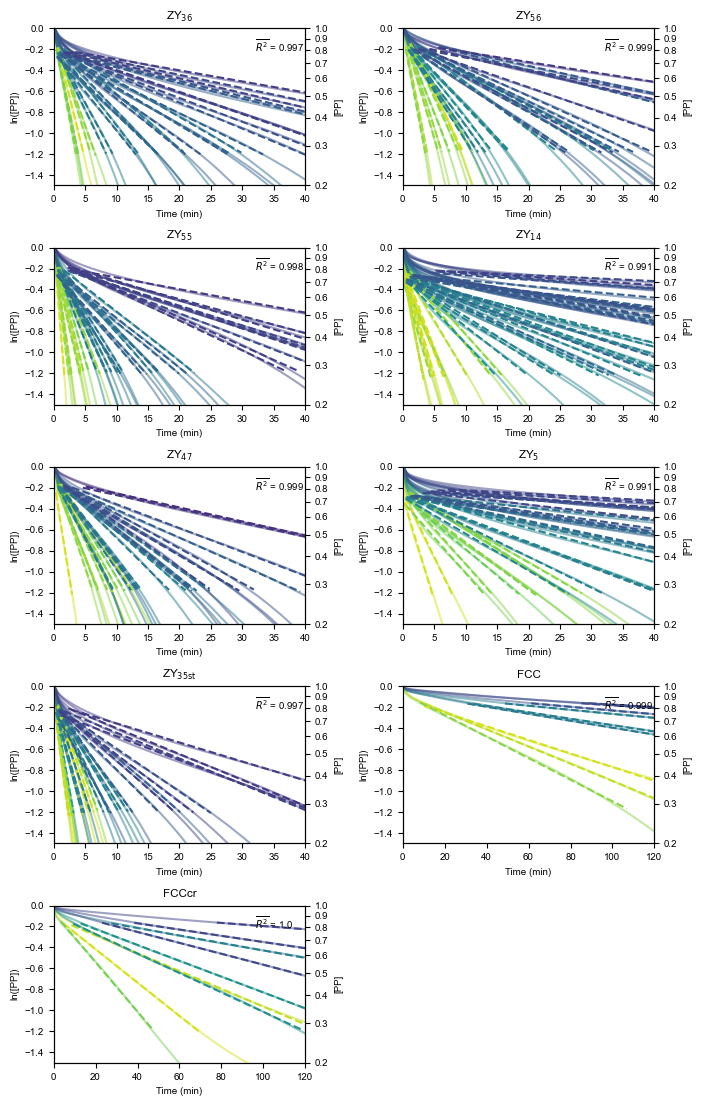

In [16]:
TGA_isothermal_dir = data_home + r"\TGA\Isothermal"
output_directory = r"results\TGA\outputs_isothermal"

exp_list = os.listdir(TGA_isothermal_dir)
list_adjusted_bounds = []

fig, axs = plt.subplots(5,2,figsize=(18/2.54,28.12/2.54))
def process_iso_TGA(exp_dir,selector = 'all', savedata=True,plot_fit = True,plot_all = True,ax1='False'):
    name = exp_dir[-3:]
    catname = dbq.get_catname(name)
    TGA_filepaths = glob.glob(exp_dir+'/*.txt')
    all_TGA_filenames = [TGA_filepath.split('\\')[-1] for TGA_filepath in TGA_filepaths] 
    if selector == 'all':
        select_files=[i for i in range(len(all_TGA_filenames))]#selects all
    else:
        select_files = selector

    start_conv_set=0.75 #set the percentage of remaining plastic at which the linear regression starts
    conv_set=0.3     #set the percentage of remaining plastic at which the linear regression stops
    if catname == 'FCC' or 'FCCcr':
        start_conv_set=0.85
        conv_set=0.3

    lowbound_list = []
    highbound_list = []

    rundirs = [TGA_filepaths[num] for num in select_files]
    TGA_filenames = [all_TGA_filenames[i] for i in select_files]
   
    framelist = []
    plot_or_not_list = []

    col_labels = ['slope', 'intercept', 'r_value', 'p_value', 'std_err','C_rel','temperature']
    Result_Frame = pd.DataFrame(columns=col_labels)
    Result_Frame['file']=TGA_filenames

    files_adjusted = []

    for rundir in rundirs:
        #Loading data------------------------
        TGA_iso = tga.parse_txt(rundir,type='pyro_iso',calculate_DTGA = True)
        frame = TGA_iso.cracking()
        frame_burnoff = TGA_iso.burnoff()

        #For 2 samples the taring was swapped. Adjusting:
        if rundir == TGA_isothermal_dir+ '/Z03\SR_TGA_0090_Z03_P1-001-3_BM_iso230_ratio_1_repro_01.txt':
            frame['Unsubtracted weight']+=0.556
            frame_burnoff['Unsubtracted weight']+=0.556
        if rundir == TGA_isothermal_dir+'/Z03\SR_TGA_0090_Z03_P1-001-3_BM_iso230_ratio_1_repro_02.txt':
            frame['Unsubtracted weight']-=0.556
            frame_burnoff['Unsubtracted weight']-=0.556
            
        cat_weight = TGA_iso.m_cat()
        polymer_weight = TGA_iso.m_poly()
        C_rel = cat_weight/polymer_weight #catalyst concentration in units of polymer weight(kept the same at ca. 5mg)

        temperature = TGA_iso.temp()

        frame['time_pyro'] = frame['Time']-frame['Time'].iloc[0]
        framelist.append(frame) 

        #Modelling section---------------------------------
        frame['log_rel_weight'] = np.log(frame['rel_weight_pwl'])
        F_Model = frame[['time_pyro','log_rel_weight']]

        #Determine where to do the fit. In some cases the reaction goes to too slow for a fit in the target range. 
        #First try if its possible to fit in the range defined by the set. If not, adjust the range to the minimum or maximum conversion reached
        #for the upper bound of the fit:
        if min(frame['rel_weight_pwl']) <= conv_set: # normal case
            highbound = F_Model.loc[F_Model['log_rel_weight'] <= np.log(conv_set), 'time_pyro'].iloc[0]
            highbound_list.append(highbound)
        else: #if conversion too low, just used the maximum conversion
            min_conv_bounds = min(frame['rel_weight_pwl']) 
            highbound = F_Model.loc[F_Model['log_rel_weight'] <= np.log(min_conv_bounds), 'time_pyro'].iloc[0] #if the conv_set is not reached, adjust the conversion range
            highbound_list.append(highbound)
            files_adjusted.append(rundir.split('\\')[-1])

        lowbound = F_Model.loc[F_Model['log_rel_weight'] <= np.log(start_conv_set), 'time_pyro'].iloc[0]
        lowbound_list.append(lowbound)        
        
        #making a frame only in the target range
        F_Model = F_Model[(F_Model['time_pyro'] >= lowbound) & (F_Model['time_pyro'] <= highbound)]
        
        slope, intercept, r_value, p_value, std_err = linregress(F_Model['time_pyro']*60, F_Model['log_rel_weight']) #timeunit is in seconds!
    
        results = [slope, intercept, r_value, p_value, std_err, C_rel,temperature]
        Result_Frame.loc[Result_Frame['file'] == TGA_filenames[rundirs.index(rundir)], col_labels] = results


        #For plot with less data:        
        if 'repro_01' in rundir and 'ratio_4' not in rundir:
            plot_or_not_list.append(True)
        else:
            plot_or_not_list.append(False)

    #Plotting section---------------------------------
    if plot_fit == True:
        colorlist = [tga.get_color(i) for i in Result_Frame['C_rel']/Result_Frame['C_rel'].max()] #color scaling according to catalyst loading
        for i in range(len(framelist)):
            if plot_all or plot_or_not_list[i] == True:
                ax1.plot(framelist[i]['time_pyro'], framelist[i]['log_rel_weight'],'-',c=colorlist[i],alpha = 0.5)

        #adding linear fit
        for i in range(len(framelist)):
            if plot_or_not_list[i] == True or plot_all == True:
                m = Result_Frame.iloc[i]['slope']
                b = Result_Frame.iloc[i]['intercept']
                x = np.linspace(lowbound_list[i]*60,highbound_list[i]*60,100)
                y = m*x+b
                k = -m/Result_Frame.iloc[i]['C_rel']

                ax1.plot(x/60,y,'--',color=colorlist[i])

        ax1.set_ylabel('ln([PP])')
        ax1.set_xlabel('Time (min)')
        ax1.set_xlim(0,40)
        ax1.set_ylim(-1.5,0)
        if catname == 'FCC' or catname == 'FCCcr':
            ax1.set_xlim(0,120)

        ax2 = ax1.twinx()
        ax2.set_ylim(np.exp(ax1.get_ylim()))
        ax2.set_yscale('log')
        ax2.set_yticks([1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2])
        ax2.yaxis.set_major_formatter(mticker.ScalarFormatter())
        ax2.yaxis.set_minor_formatter(mticker.NullFormatter())
        ax2.set_ylabel('[PP]')
        ax2.set_title(dbq.get_catname(name))
        #to shows goodness of fits the average R**2 of all measurements is shown
        mean_r_squared = np.mean(Result_Frame['r_value']**2) 
        ax1.annotate(r'$\overline{R^2}$ = '+str(np.round(mean_r_squared,3)), xy=(0.80, 0.85),xycoords='axes fraction')

    if savedata == True:
        Result_Frame.to_csv('results\TGA\outputs_isothermal'+'/'+name+'.csv',index=False)

    return Result_Frame,framelist,files_adjusted


for i in enumerate(exp_list):
    Result_Frame,framelist,files_adjusted = process_iso_TGA(TGA_isothermal_dir+'/'+i[1],selector ='all', savedata=True,plot_fit = True,plot_all=True,ax1=axs[i[0]//2,(i[0]+2)%2])
    list_adjusted_bounds.append(files_adjusted)

axs[4,1].remove()
plt.tight_layout()
fig_path = fig_dir+'/SI/' +'isothermal_fits.svg'
plt.savefig(fig_path, bbox_inches = 'tight',transparent=True) 
plt.show()

#### Fig. 2a Isothermal TGA
Plotting with less datapoints to obtain Fig. 2a

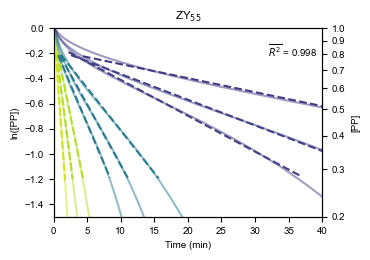

In [17]:
fig, ax = plt.subplots()
Result_Frame,framelist,files_adjusted = process_iso_TGA(TGA_isothermal_dir+'/'+'Z03',selector ='all', savedata=True,plot_fit = True,plot_all=False,ax1=ax)
plt.savefig(fig_dir+'/'+'isothermal_fit_limited.svg', bbox_inches = 'tight',transparent=True)
plt.show()

#### Fig. 2b Fitting of isothermal rate constants

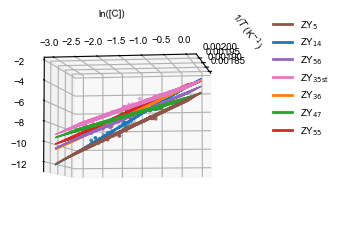

Square of mean correlation coeffcient between Ea/R and ln(A): 0.9979027698770417
Square of mean correlation coeffcient between Ea/R and b: 9.598991915251349e-05
Square of mean correlation coeffcient between b and ln(A): 0.0011081946623095445
Mean temperature: 514.7 K


In [18]:
# To make the view interactive, run notebook in an IDE that support the widget option and uncomment the line below
# %matplotlib widget
output_files_iso = glob.glob('results\TGA\outputs_isothermal'+'/*.csv')
# selector =[0,1,2,3,5]
selector =[5,3,1,6,0,4,2]

rundirs = [output_files_iso[i] for i in selector]
colorlist = [dbq.read_db(rundirs[i][-7:-4],'plotcolor') for i in range(len(rundirs))]

filenames = [rundirs[i].split('//')[-1].split('.csv')[0] for i in range(len(rundirs))]

plot_residual = False

fig = plt.figure(figsize=(8.8/2.54*1.2,6.22/2.54*1.2))
ax = fig.add_subplot(111, projection='3d')

catnames = []
temperatures_list = []
covariance_list = []
for i in range(len(rundirs)):
    cat_code = rundirs[i][-7:-4]
    catnames.append(dbq.get_catname(cat_code))
    frame = pd.read_csv(rundirs[i])

    ax.scatter(1/(frame['temperature']+273.15),np.log(frame['C_rel']),np.log(-frame['slope']),c=colorlist[i],s=3)

    def equation(data, a, b, c):
        return a * data[0] + b * data[1] + c  #a is -Ea/R in J, b is the pseudo-order, c is ln(A)

    # Extract the data from the output of the previous step
    temperatures_list.append(frame['temperature']) # needed later to determine mean temperature of the measurements
    frame['T_K'] = frame['temperature']+273.15
    inv_temp = (1/frame['T_K'])
    C_rel_data = np.log(frame['C_rel'])
    k_data = np.log(-frame['slope'])
    data = (inv_temp, C_rel_data)

    #New frame for just the fitting
    frame_fit = pd.DataFrame({'1overT(K)':inv_temp,'lnC_rel':C_rel_data,'ln_kdash':k_data})
    # Perform the curve fitting
    params, params_covariance = curve_fit(equation, data, k_data, p0=[-14375.9107718728, 1.89309356914604, 24.22406863],)
    covariance_list.append(params_covariance) #important for compensation plot later

    # Extract the fitted parameters
    a_fit, b_fit, c_fit = params[:3]
    error =  np.sqrt(np.diag(params_covariance))

    Ea = -a_fit*8.314/1000 #output in kJ/mol
    Ea_error = error[0]*8.314/1000
    #saving the fitted data with error to a csv

    fit_output_frame = {'Ea_PP': [Ea], 'Ea_error_PP': [Ea_error], 'n_PP': [b_fit], 'n_error_PP': [error[1]], 'ln(A)_PP': [c_fit], 'ln(A)_error_PP': [error[2]]}
    #important: The Errors in ln(A) and Ea are correlated, use a confidence ellipse instead of regular erorbars.

    #Plotting----------------------------------------
    # calculate the datapoints for the fitted surface
    T_lower = 220
    T_upper = 270
    T_surf = 1/(np.linspace(T_lower,T_upper,10)+273.15)
    C_rel_surf = np.log(np.linspace(0.05,1,10))
    X, Y = np.meshgrid(T_surf, C_rel_surf)
    k_surf = equation((X, Y), a_fit, b_fit, c_fit)
    ax.plot_surface(X, Y, k_surf,edgecolor=colorlist[i],color=colorlist[i], alpha=0.1)

    for parameter in ['Ea_PP','Ea_error_PP','n_PP','n_error_PP','ln(A)_PP','ln(A)_error_PP']:
        dbq.write_db(cat_code,parameter,fit_output_frame[parameter])

    #To look at the residual:
    if plot_residual == True:
        frame_fit['ln_kdash_fit'] = equation((frame_fit['1overT(K)'],frame_fit['lnC_rel']), a_fit, b_fit, c_fit)
        frame_fit['residual'] = frame_fit['ln_kdash']-frame_fit['ln_kdash_fit']
        frame_fit['residual_square'] = (frame_fit['residual']**2)

        fig_residual = plt.figure(figsize=(5, 5))
        ax_residual = fig_residual.add_subplot(111, projection='3d')
        ax_residual.scatter(frame_fit['1overT(K)'],frame_fit['lnC_rel'],frame_fit['residual_square'],c=frame_fit['residual_square'], cmap='viridis')
        ax_residual.view_init(-5,9, 0)
        ax_residual.set_xlabel('1/T (K$^{-1}$)')
        ax_residual.set_ylabel(r'ln([C])')
        ax_residual.set_zlabel('$R^2$')
        plt.show()
    
ax.set_xlabel('1/$T$ (K$^{-1}$)')
ax.set_zlabel(r"ln($k'$)")
ax.set_ylabel(r'ln([C])')
custom_lines = [Line2D([0], [0], color=colorlist[i], lw=2) for i in range(len(rundirs))]
ax.legend(custom_lines, catnames, loc='upper left',bbox_to_anchor=(1.1, 1), frameon=False)

#set azimuth and elevation
ax.view_init(-5,9, 0)

plt.savefig(fig_dir + '/Ea_surface.svg',transparent=True,bbox_inches='tight')
plt.show()

#Checking the correlations between the fitted parameters
correlations_E_A= []
correlations_E_b = []
correlations_b_A = []
for matrix in covariance_list:
    correlation_matrix = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            correlation_matrix[i,j] = matrix[i,j]/np.sqrt(matrix[i,i]*matrix[j,j])
    correlations_E_A.append(correlation_matrix[0,2])
    correlations_E_b.append(correlation_matrix[0,1])
    correlations_b_A.append(correlation_matrix[1,2])

# print('Correlation between Ea/R and b: ' + str(-correlation_matrix[0,1]))
print('Square of mean correlation coeffcient between Ea/R and ln(A): ' + str(np.mean(correlations_E_A)**2))
print('Square of mean correlation coeffcient between Ea/R and b: ' + str(np.mean(correlations_E_b)**2))
print('Square of mean correlation coeffcient between b and ln(A): ' + str(np.mean(correlations_b_A)**2))
# print('Correlation between b and ln(A): ' + str(correlation_matrix[1,2]))

temperatures = [item for sublist in temperatures_list for item in sublist]
temp_array = np.array(temperatures)
mean_temp = np.mean(temp_array)
print('Mean temperature: ' + str(np.round(mean_temp+273,2)) + ' K')

#### Fig. 2c Projection of fitting results
As comparing data in the 3D plot is inconvenient, we 'project' the data on one acis by calculating k(ln[C]) at a fixed temperature from the fitting results.

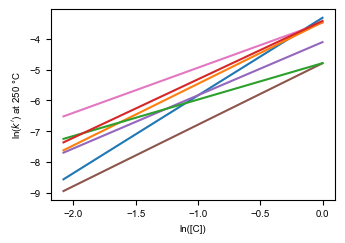

In [19]:
%matplotlib inline
def calc_lnk(Ea,lnA,n,lnC_rel,T):
    R = 8.314
    lnk= -Ea/(R)*1/T + lnA + n*lnC_rel
    return lnk

loadings = np.linspace(np.log(1),np.log(1/8),100)
Ts = [250+273.15] 
alpha= [1, 0.5,0.1]

fig, ax = plt.subplots()
for i in range(len(rundirs)):
    for j in range(len(Ts)):
        cat_code = rundirs[i][-7:-4]
        Ea = dbq.read_db(cat_code,'Ea_PP')*1000
        lnA = dbq.read_db(cat_code,'ln(A)_PP')
        n = dbq.read_db(cat_code,'n_PP')
        color = colorlist[i]
        lnk = calc_lnk(Ea,lnA,n,loadings,Ts[j])
        ax.plot(loadings,lnk, color = color,alpha = alpha[j])
    
ax.set_xlabel('ln([C])')
ax.set_ylabel('ln($k\'$) at 250 °C')
plt.tight_layout()
plt.savefig(fig_dir + '/lnk_lnc_realtionships.svg',transparent=True,bbox_inches='tight')
plt.show()

#### Fig. 2d Constable plot for PP cracking

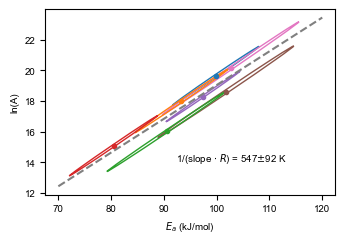

In [20]:
#Compensation plot plastic cracking----------
from utils.misc.confidence_ellipse import confidence_ellipse_matrix #code adapted from https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html
from scipy import odr
set_plot_params()
x = []
y = []
set_plot_params()
fig, ax = plt.subplots()
for i in range(len(rundirs)):
    cat_code = rundirs[i][-7:-4]
    Ea = dbq.read_db(cat_code,'Ea_PP')
    x.append(Ea)
    lnA = dbq.read_db(cat_code,'ln(A)_PP')
    y.append(lnA)
    matrix_full = covariance_list[i]
    matrix_red = np.array([[matrix_full[0,0],-matrix_full[0,2]],[-matrix_full[2,0],matrix_full[2,2]]])
    confidence_ellipse_matrix(Ea,lnA,matrix_red,ax,edgecolor=dbq.read_db(cat_code,'plotcolor'),n_std=1)
    ax.plot(Ea,lnA,'o',color=dbq.read_db(cat_code,'plotcolor'),markersize=3)

def f(B,x):
    return B[0]*x + B[1]

Model = odr.Model(f)
Data = odr.RealData(x,y)
myodr = odr.ODR(Data,Model,beta0=[1,1])
myoutput = myodr.run()

slope, intercept = myoutput.beta
std_err, errorA = myoutput.sd_beta
rel_error = std_err/slope

x_fit = np.linspace(70,120,100)
y_fit = slope*x_fit+intercept
ax.plot(x_fit,y_fit,color='grey', linestyle='--')

# calculate characteristic temperature
temp = 1/(slope*8.314/1000)
error =  np.round(1/(slope*8.314/1000)*rel_error,0)
#annotate with characteristic temperature
ax.annotate('1/(slope $\cdot$ $R$) = '+str(round(temp))+'$\pm$'+str(int(error))+' K', xy=(0.45, 0.18), xycoords='axes fraction')

ax.set_ylabel('ln(A)')
ax.set_xlabel('$E_a$ (kJ/mol)')
plt.tight_layout()
plt.savefig(fig_dir + '/Ea_A_constable.svg',transparent=True,bbox_inches='tight')
plt.show()

#### Fig. 2e Constable plot for DMP cracking

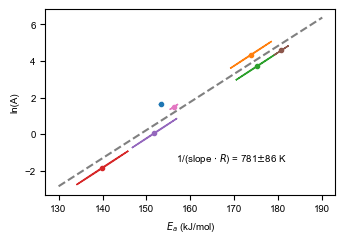

In [21]:
### Compensation effect DMP cracking
%matplotlib inline
set_plot_params()

fig, ax = plt.subplots()
for i in range(len(outputs_gascracking)):
    dict = outputs_gascracking[i]
    pcov = np.array([[dict['pcov'][0,0],-dict['pcov'][0,1]],[-dict['pcov'][1,0],dict['pcov'][1,1]]]) # covariance matrix is in -Ea, not Ea - the elements need to be inverted
    confidence_ellipse_matrix(dict['Ea'],dict['lnA'],pcov,ax,edgecolor=dbq.read_db(dict['catcode'],'plotcolor'),n_std=1)
    ax.plot(dict['Ea'],dict['lnA'],'o',color=dbq.read_db(dict['catcode'],'plotcolor'),markersize=3)

x = [dict['Ea'] for dict in outputs_gascracking]
y = [dict['lnA'] for dict in outputs_gascracking]

def f(B,x):
    return B[0]*x + B[1]

Model = odr.Model(f)
Data = odr.RealData(x,y)
myodr = odr.ODR(Data,Model,beta0=[1,1])
myoutput = myodr.run()

slope, intercept = myoutput.beta
std_err, errorA = myoutput.sd_beta
rel_error = std_err/slope

x_fit = np.linspace(130,190,100)
y_fit = slope*x_fit+intercept
ax.plot(x_fit,y_fit,color='grey', linestyle='--')

# calculate characteristic temperature
temp = 1/(slope*8.314/1000)
error =  np.round(1/(slope*8.314/1000)*rel_error,0)
#annotate with characteristic temperature
ax.annotate('1/(slope $\cdot$ $R$) = '+str(round(temp))+'$\pm$'+str(int(error))+' K', xy=(0.45, 0.18), xycoords='axes fraction')

ax.set_ylabel('ln(A)')
ax.set_xlabel('$E_a$ (kJ/mol)')
plt.tight_layout()
plt.savefig(fig_dir + '/DMP_cracking_Constable.svg',transparent=True,bbox_inches='tight')
plt.show()

#### Fig. E1 Isothermal TGA of PP cracking using FCC Catalysts

 WARNING | (UserWarning) set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
 WARNING | (UserWarning) set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


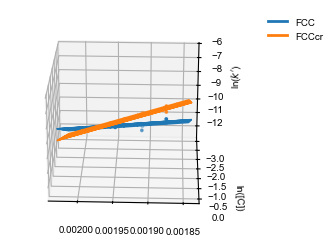

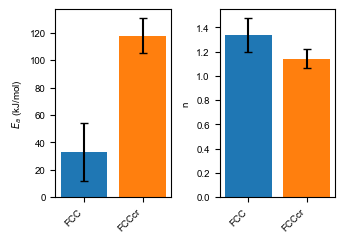

In [22]:
output_files_iso = glob.glob('results\TGA\outputs_isothermal'+'/*.csv')
selector =[-2,-1]

rundirs = [output_files_iso[i] for i in selector]
colorlist = ['C0','C1']

filenames = [rundirs[i].split('//')[-1].split('.csv')[0] for i in range(len(rundirs))]

plot_residual = False

fig = plt.figure(figsize=(8.8/2.54*1.2,6.22/2.54*1.2))
ax = fig.add_subplot(111, projection='3d')

catnames = []
temperatures_list = []
covariance_list = []
for i in range(len(rundirs)):
    cat_code = rundirs[i][-7:-4]
    catnames.append(dbq.get_catname(cat_code))
    # catnames.append(dbq.read_db(cat_code,'SAR'))
    frame = pd.read_csv(rundirs[i])

    ax.scatter(1/(frame['temperature']+273.15),np.log(frame['C_rel']),np.log(-frame['slope']),c=colorlist[i],s=3)

    def equation(data, a, b, c):
        return a * data[0] + b * data[1] + c  #a is Ea/R in J, b is the pseudo-order, c is ln(A)

    # Extract the columns from the DataFrame
    temperatures_list.append(frame['temperature'])
    frame['T_K'] = frame['temperature']+273.15
    inv_temp = (1/frame['T_K'])
    C_rel_data = np.log(frame['C_rel'])
    k_data = np.log(-frame['slope'])
    data = (inv_temp, C_rel_data)

    #make a new frame with jsut the data that is beeing plotted
    frame_fit = pd.DataFrame({'1overT(K)':inv_temp,'lnC_rel':C_rel_data,'ln_kdash':k_data})
    # Perform the curve fitting
    params, params_covariance = curve_fit(equation, data, k_data, p0=[-14375.9107718728, 1.89309356914604, 24.22406863],)
    covariance_list.append(params_covariance)

    # Extract the fitted parameters
    a_fit, b_fit, c_fit = params[:3]
    error =  np.sqrt(np.diag(params_covariance))

    Ea = -a_fit*8.314/1000 #output in kJ/mol
    Ea_error = error[0]*8.314/1000
    #saving the fitted data with error to a csv

    fit_output_frame = {'Ea_PP': [Ea], 'Ea_error_PP': [Ea_error], 'n_PP': [b_fit], 'n_error_PP': [error[1]], 'ln(A)_PP': [c_fit], 'ln(A)_error_PP': [error[2]]}

    #plot the fitted surface
    # calculate the datapoints for the fitted surface
    T_lower = 220
    T_upper = 270
    T_surf = 1/(np.linspace(T_lower,T_upper,10)+273.15)
    C_rel_surf = np.log(np.linspace(0.05,1,10))
    X, Y = np.meshgrid(T_surf, C_rel_surf)
    k_surf = equation((X, Y), a_fit, b_fit, c_fit)
    #plot the fitted surface as mesh
    ax.plot_surface(X, Y, k_surf,edgecolor=colorlist[i],color=colorlist[i], alpha=0.1)



    for parameter in ['Ea_PP','Ea_error_PP','n_PP','n_error_PP','ln(A)_PP','ln(A)_error_PP']:
        dbq.write_db(cat_code,parameter,fit_output_frame[parameter])

    #calcuate the residual and plot if required
    if plot_residual == True:
        frame_fit['ln_kdash_fit'] = equation((frame_fit['1overT(K)'],frame_fit['lnC_rel']), a_fit, b_fit, c_fit)
        frame_fit['residual'] = frame_fit['ln_kdash']-frame_fit['ln_kdash_fit']
        frame_fit['residual_square'] = (frame_fit['residual']**2)

        fig_residual = plt.figure(figsize=(5, 5))
        ax_residual = fig_residual.add_subplot(111, projection='3d')
        ax_residual.scatter(frame_fit['1overT(K)'],frame_fit['lnC_rel'],frame_fit['residual_square'],c=frame_fit['residual_square'], cmap='viridis')
        ax_residual.view_init(-5,9, 0)
        ax_residual.set_xlabel('1/T (K$^{-1}$)')
        ax_residual.set_ylabel(r'ln([C])')
        ax_residual.set_zlabel('$R^2$')
        plt.show()
    

ax.set_xlabel('1/$T$ (K$^{-1}$)')
ax.set_zlabel(r"ln($k'$)")
ax.set_ylabel(r'ln([C])')
custom_lines = [Line2D([0], [0], color=colorlist[i], lw=2) for i in range(len(rundirs))]
ax.legend(custom_lines, catnames, loc='upper left',bbox_to_anchor=(1.1, 1), frameon=False)

#set azimuth and elevation
ax.view_init(25,92, 0)
# rotate x ticks by 45 degrees
#save as svg
plt.savefig(fig_dir + '/Ea_surface_FCC.svg',transparent=True,bbox_inches='tight')


#plot Ea and b as barchart
fig, ax = plt.subplots(1,2)
db_frame = dbq.get_db()
catcodes = ['Z15','Z16']
Ea = [dbq.read_db(i,'Ea_PP') for i in catcodes]
Ea_error = [dbq.read_db(i,'Ea_error_PP') for i in catcodes]
b = [dbq.read_db(i,'n_PP') for i in catcodes]
b_error = [dbq.read_db(i,'n_error_PP') for i in catcodes]

ax[0].bar(catnames,Ea,yerr=Ea_error,color=colorlist,capsize =3)
ax[0].set_ylabel('$E_a$ (kJ/mol)')
ax[0].set_xticklabels(catnames, rotation=45, ha='right')

ax[1].bar(catnames,b,yerr=b_error,color=colorlist,capsize =3)
ax[1].set_ylabel('n')
ax[1].set_xticklabels(catnames, rotation=45, ha='right')
plt.tight_layout()
plt.savefig(fig_dir + '/Ea_b_barchart_FCC.svg',transparent=True,bbox_inches='tight')
plt.show()

#### Determination of framework Al content by Al NMR (Fig. S13)
Nuclear magnetic resonance (NMR) measurements were performed on a 11.74 T Bruker Avance III spectrometer using a 3.2 mm MAS NMR probe. The spectra were recorded at ambient temperature with a spinning rate of 15 kHz. A resonance frequency of 130.3 MHz was used, and a single-pulse π/6 excitation with a repetition time of 1 s was applied. The 27Al chemical shift was externally referenced to an aqueous aluminum nitrate (Al(NO3)3) solution. The NMR spectra were processed using a line-broadening of 100 Hz. 2 or 3 Voigt functions were fitted to the data, share of framework Aluminium was determined from the integral of the peak centered around 60 ppm. Spectra are depicted in Fig. S13.

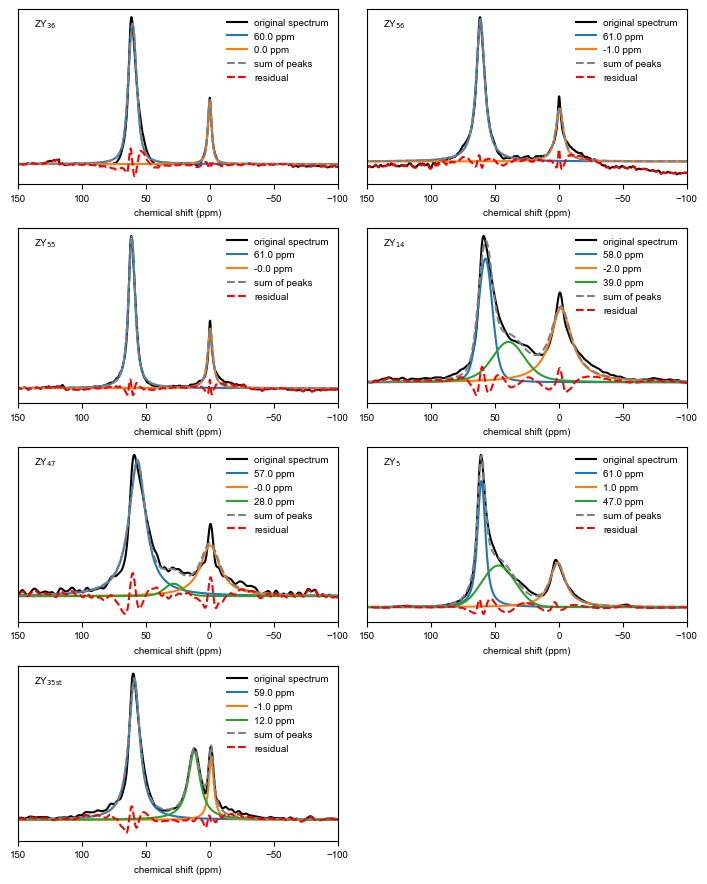

In [23]:
data_AlNMR  = data_home + "/NMR/27Al"
output = result_dir+"/NMR"
files = os.listdir(data_AlNMR)

normalization = 'max' #for fitting, normalizing the spectra to max
from scipy.optimize import curve_fit
from scipy.special import wofz
from scipy import integrate

def voigt(x, x0, sigma, gamma, A):
    z = (x-x0 + 1j*gamma) / (sigma * np.sqrt(2))
    return wofz(z).real / (sigma * np.sqrt(2*np.pi)) * A

def fit_voigt(x, *params):
    num_peaks = len(params) // 4
    result = np.zeros_like(x)
    for i in range(num_peaks):
        x0 = params[i*4]
        sigma = params[i*4 + 1]
        gamma = params[i*4 + 2]
        A = params[i*4 + 3]
        result += voigt(x, x0, sigma, gamma, A) 
    return result


pd.options.mode.chained_assignment = None
save = False

fig, ax = plt.subplots(4,2,figsize=(18/2.54,22.5/2.54))
for i in range(len(files)):
    file = files[i]
    catname = file[0:3]
    data = pd.read_csv(os.path.join(data_AlNMR, file), sep=',', header=None, names=['index','intensity','no_idea', 'ppm'],skiprows=1)
    data_sel = data.loc[(data['ppm'] > -200) & (data['ppm'] < 200)]
    if normalization == 'integral':
        data_sel['norm'] = data_sel['intensity']/integrate.trapz(data_sel['ppm'],data_sel['intensity'])
    if normalization == 'max':
        data_sel['norm'] = data_sel['intensity']/np.max(data_sel['intensity'])

    x_data = data_sel['ppm'].values
    y_data = data_sel['norm'].values
    # Formattiting of the parameters
    # params = [x0_1, sigma_1, gamma_1, A_1, x0_2, sigma_2, gamma_2, A_2, x0_3, sigma_3, gamma_3, A_3, x0_4, sigma_4, gamma_4, A_4,x0_5, sigma_5, gamma_5, A_5]

    #reading in the initial guess
    try:
        result_frame = pd.read_csv(output+'/'+ catname + '_Al_NMR_output.csv')
        result_frame.drop(columns=['peak','norm_integral'], inplace=True)
        initial_guess = result_frame.values.flatten()
    except:
        print('no initial guess found, specify manually')
        initial_guess = [ 6.19486768e+01,  1.09424047e-05,  2.89570008e+01,  8.47251743e+01,
        -4.35016047e+00,  2.98497749e+01, -2.80097859e+00,  1.88893513e+01]


    num_peaks = len(initial_guess) // 4

    popt, pcov = curve_fit(fit_voigt, x_data, y_data, p0=initial_guess, maxfev=10000000)

    x_fit = np.linspace(x_data.min(), x_data.max(), len(x_data))
    y_fit = fit_voigt(x_fit, *popt)

    ax[i//2,(i+2)%2].plot(x_data, y_data, label='original spectrum',color='black')

    peak_integrals = []
    for j in range(num_peaks):
        peak_fit = fit_voigt(x_fit, *popt[j*4:(j*4+4)])
        ax[i//2,(i+2)%2].plot(x_fit, peak_fit, label= str(np.round(popt[j*4]))+ ' ppm')
        peak_integral = integrate.trapezoid(peak_fit, x_fit)
        peak_integrals.append(peak_integral)

    #normalize the integrals
    peak_integrals_norm = peak_integrals/np.sum(peak_integrals)
    peaknames = [np.round(popt[i],0) for i in range(0,len(popt),4)]
    output_frame = pd.DataFrame({'peak':peaknames, 'norm_integral':peak_integrals_norm})
    output_frame['x01'] = popt[0::4]
    output_frame['sigma'] = popt[1::4]
    output_frame['gamma'] = popt[2::4]
    output_frame['A'] = popt[3::4]

    dbq.write_db(catname,'share_F_Al',np.max(peak_integrals_norm))
    if save:
        output_frame.to_csv(output+'/'+ catname + '_Al_NMR_output.csv', index=False)

    #plot the sum of all peaks
    ax[i//2,(i+2)%2].plot(x_fit, y_fit, label='sum of peaks', linestyle='--', color='grey')
    #plot residual
    residual = y_data - np.flip(y_fit)
    ax[i//2,(i+2)%2].plot(x_fit, np.flip(residual), label='residual', linestyle='--', color='red')
    ax[i//2,(i+2)%2].set_xlim(150,-100)
    ax[i//2,(i+2)%2].set_xlabel('chemical shift (ppm)')
    #hide y axis
    ax[i//2,(i+2)%2].yaxis.set_visible(False)
    # if i == 0:
    ax[i//2,(i+2)%2].legend(frameon = False)
    #annotate with Catname
    ax[i//2,(i+2)%2].annotate(dbq.get_catname(catname), xy=(0.05, 0.9), xycoords='axes fraction')

ax[3,1].remove()
plt.tight_layout()
plt.savefig(fig_dir + '/SI/Al_NMR_fits.svg',transparent=True)
plt.show()

#### Fig. 2f n as funciton of framework Al content

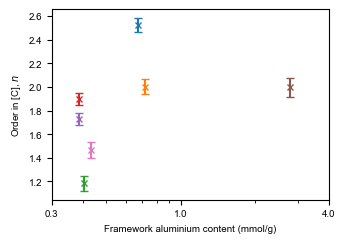

In [26]:
#Plotting n as a function of framework Al content, see below for Al NMR processing
import matplotlib.ticker as ticker
fig, axs = plt.subplots()
db_frame = dbq.get_db()

db_frame = db_frame.loc[db_frame['Al_F_content'].notna()]
for i in range(len(db_frame)):
    axs.errorbar(db_frame['Al_F_content'].iloc[i],db_frame.iloc[i]['n_PP'],yerr=db_frame.iloc[i]['n_error_PP'],fmt='x',capsize=3,markersize=5, color=db_frame.iloc[i]['plotcolor'],label=db_frame.iloc[i].index)

axs.set_xlabel('Framework aluminium content (mmol/g)')
axs.set_ylabel('Order in [C], $n$')
axs.set_xscale('log')
axs.set_xticks([0.3,1,4])
axs.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
plt.tight_layout()
plt.savefig(fig_dir+'/multifit_Ea_results.svg',bbox_inches = 'tight',transparent=True)
plt.show()

### Rationalizing the varying effect of catalyst loading 

To rationalize these very large differences between the catalysts, we first aimed at excluding effects of accessibility as sole cause. The mesopore structure of the catalysts was studied by non-local density functional theory (NL-DFT) from Ar physisorption at 87 K using the adsorption branch and a hybrid kernel of spherical micropores and cylindrical mesopores. See Fig. S6 for the isotherms. Hg porosimetry was employed as an additional technique. Fig. 3a shows the results for 4 selected catalysts for pore diameters between 2 and 100 nm (see Fig. S6 for the remaining catalysts which are not shown for clarity). The mesopore volume determined by Hg porosimetry was significantly lower than determined by physisorption, which could be explained by constriction of the mesopores (supplementary note 3).26 The pore size distributions were very similar for all steamed catalysts, with the exemption of ZY<sub>14</sub> which shows less mesopores between 2-3 nm  diameter likely because this catalyst was only steamed once, not twice, as is the case with ZY<sub>36</sub>-55.[38] The unsteamed ZY<sub>5</sub> showed even less mesoporosity determined by NL-DFT and almost no detectable Hg intrusion in this pore size regime, in-line with barely observed hysteresis in its Ar isotherm (see Fig. S5). There is no clear trend between the pseudo-order n and the pore size distribution, especially for ZY<sub>47</sub> and ZY<sub>56</sub>, which exhibit different n at very similar pore size distributions. Additionally, for the crushed and pristine FCC catalysts, both materials show comparable n (Fig. E1).  From this we conclude that mass transport effects are not the principal factor determining the scaling of observed activity with changes in catalyst loading. 

![Figure 3](figures_annotated/Fig3.svg)

**Fig. 3: Rationalizing differences in pseudo-order in catalyst loading.** *a,Pore size distribution for 4 selected zeolites determined by non-local density functional theory (NL-DFT) of the adsorption branch of Ar physisorption at 87 K using a hybrid kernel of spherical micropores and cylindrical mesopores as well as Hg porosimetry. See Fig. S6 for all catalyst materials under study, which were omitted for clarity. b, Simulated weight-loss profiles for a plastic cracking reaction. The bonds to be cracked were selected randomly using different probability distributions: In blue, the probability follows a gaussian distribution around the middle of the chain, in orange the probability decreases exponentially from the chain end. First order kinetics in bonds broken were enforced. Insert shows schematically the steps of the simulation. c, Cartoons depicting how different location of acid sites could determine which bonds along the polymer backbone are cracked. Polymer chain in yellow, catalyst surface in blue. d, Cartoon showing how acid sites in different locations could work in tandem by consecutive viscosity reduction leading to a self-accelerating effect. e, Scanning electron micrograph of ZY14 particles. Extended chains and ideal coil sizes for polypropylene (PP) with a Mw = 23,000 g/mol ¬are drawn schematically to illustrate relative length scales. See Fig. S7 for the scanning electron microscopy (SEM) images of all catalyst materials under study. *

We were not able to find a consistent correlation between n and a variety of catalyst properties, including particle size determined by scanning electron microscopy (SEM) (Fig. S7) which was very similar for all catalysts, and combinations of porosity and acidity metrics, e.g., the volumetric and surface density of acid sites in the mesopores. 
The observed weight loss kinetics are not purely determined by the rate at which chemical bonds are cleaved. The location at which the polymer is cleaved along the backbone is also critical.39 This can be shown by a simplified simulation of the process: We assumed that at the start a ‘reactor’ contains 10 polymer chains of 200 identical carbon units. In each timestep, a chain was selected with increasing probability depending on its length, followed by the selection of a bond to be cleaved according to probability distributions representing two limiting cases: In one limiting case, a hypothetical catalyst material enabled mostly chain-end scission, which was modelled by the probability of selection decreasing exponentially from one chain end. In the second limiting case, a second hypothetical catalyst enabled mostly middle-of-chain scission, which was modeled by a gaussian around the middle of the chain (Fig. 3b, insert). After selection of the bond, it was cleaved with a probability depending linearly on the number of bonds in the reactor, enforcing first order kinetics. All short molecules below a specified length were then removed from the reactor, the remaining ‘mass’ was determined and the next timestep initiated. The simulation ran 5 times and the resulting weight loss profiles averaged. Details can be found in the SI, while the python code can be found in the companion Jupyter notebook. 
Fig. 3b shows the results of the simulation for the two limiting cases. At the very beginning, the cracking rate for the ‘chain-end’ model was higher, which was expected since small molecules are formed and leave the ‘reactor’ right from start. However, the ‘middle-of-chain’ model quickly began to react faster, as with few scissions a large number of molecules just below the cutoff length were formed. Therefore, if a catalyst cleaves different bonds along the backbone, it can lead to a difference in weight loss kinetics even if the turn-over frequency (TOF) of the active sites per bond remains the same. This further complicates kinetic analysis of the polyolefins cracking process, as from pure weight loss data it cannot be discerned if an increase in rate is due to higher TOF of the active sites or related to a change in cracking location. We therefore are unable to conclusively explain the origin of variations in n. However, we suspect that the exact location and distribution of (external) acid sites might play a critical role.
If the reaction proceeds largely in mesopores, a processive mechanism[40] with predominantly chain end scission could be dominating (Fig. 3c). On the outermost surface, extended polymer chains can stretch over a large part of the zeolite particle as can be seen from a comparison of an extended chain and electron micrographs (Fig. 3e). A single polymer macromolecule can therefore be expected to interact with multiple acid sites simultaneously. This becomes more evident if the average distance between external acid sites is estimated (supplementary note 4) and compared to an ideal coil or extended chain length of the polymers: For ZY<sub>14</sub>, the average distance between external sites was estimated at 5 nm. By comparison, an ideal coil of PP with a Mw of 27,000 g/mol shows a diameter of 13 nm, while an extended chain is 163 nm long.[23] Therefore, a different arrangement of acid sites could have an influence on the location of cracked bonds along the polymer backbone. If active sites are accumulated together, more chain end scission could be expected, while a more homogenous distribution could cause more evenly distributed cracking probability along the polymer backbone (Fig. 3c). 
Lastly, pre-cracking at the outermost surface of the catalyst material could lower the molecular weight and the viscosity of the melt enough for product molecules to react further in the micropores of the catalyst. Therefore, an increase in external acidity in combination with a high concentration of acid sites in micropores could lead to self-reinforcing effect, which would result in pseudo-orders >1. The degree of this self-reinforcement will be a result of an interplay between external and bulk acidity (Fig. 3d).


### Rationalizing the varying effect of catalyst loading  (code)

#### Ar Physisorption and Porosimetry
**Ar Physisorption** measurements were conducted at 87 K using a 3P Sync 400. All samples were dried at 400 °C under vacuum for 10 h prior to measurement. The surface area was determined by 3 methods: BET (with automated optimization of Rouquerol criteria as implemented in PyGAPS [46]), excess surface work [47] and non-linear density functional theory (NL-DFT). For NL-DFT analysis, a hybrid kernel of spherical micropores and cylindrical mesopores which for applied to mesoporous ZY previously48 was fitted to the adsorption branch. All three methods showed the same trends. The total pore volume was determined at p/p0 of 0.99. Micro/mesopore volume were determined by the t-plot method as implemented in PyGAPS,46 and NL-DFT, as the t-plot method has been shown to underestimate micropore volume for mesoporous zeolites.49 For t-plot, a reference isotherm of Ar at 87 K on silica50 was utilized. 2 nm were used as a cutoff diameter for micropores in NL-DFT. The mesopore volume was calculated as the difference between the total pore volume and the micropore volume. The two methods showed comparable micropore volumes (linear regression showed a R2=0.96), with the t-plot method yielding ~20% lower volumes, in agreement with prior literature.49

##### Isotherms (Fig. S5)

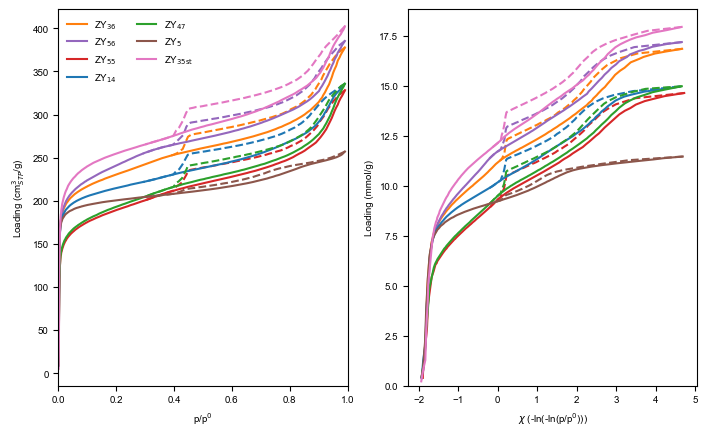

In [35]:
import pygaps.parsing as pgp
import pygaps.graphing as pgg
import pygaps.characterisation as pgc

# processing of isotherms
data_isotherms = data_home + '/Physisorption_Porosimetry/isotherms/'
paths = os.listdir(data_isotherms)

# list of paths to files
selector = [0,1,2,3,4,5,6]
selected_paths = [paths[i] for i in selector]
isotherms = [pgp.isotherm_from_commercial(data_isotherms+path, '3p', 'xl') for path in selected_paths]

def get_sample_label(path):
    sheet = pd.read_excel(data_isotherms+path, sheet_name='Summary',index_col=0)
    return sheet.loc['Sample'][0]


names = [get_sample_label(path) for path in selected_paths]
codes = [i[0:3] for i in names]
labels = [dbq.get_catname(i) for i in codes]
colors = [dbq.read_db(i,'plotcolor') for i in codes]

for i in range(len(isotherms)):
    isotherms[i].temperature = 87.45
    isotherms[i].material = labels[i]

fig, ax = plt.subplots(1,2,figsize=(18/2.54,11.12/2.54))

#Isotherm plot
ax[0] = pgg.plot_iso(
    isotherms,
    x_range=(0,1),
    lgd_keys=['material'],
    color=colors,ax=ax[0],marker=False
)
ax[0].set_xlabel('p/p$^0$')
ax[0].set_ylabel('Loading (cm$_{STP}^3$/g)')
ax[0].set_xlim(0)

#Chi Plot - allows to comapre isotherms easier
for i in range(len(isotherms)):
    isotherms[i].convert_loading(unit_to='mmol')
    chi = -np.log(-np.log(isotherms[i].data(branch = 'ads')['pressure']))
    loading = isotherms[i].data(branch = 'ads')['loading']
    ax[1].plot(chi,loading, color = colors[i],label = labels[i])
    chi_des = -np.log(-np.log(isotherms[i].data(branch = 'des')['pressure']))
    loading_des = isotherms[i].data(branch = 'des')['loading']
    ax[1].plot(chi_des,loading_des, color = colors[i],label = labels[i],linestyle='--')


ax[1].set_xlabel(r'$\chi$ (-ln(-ln(p/p$^0$)))')
ax[1].set_ylabel('Loading (mmol/g)')
ax[1].set_ylim(0,)
ax[0].legend(fontsize =7,ncol=2,frameon= False)

plt.tight_layout()
plt.savefig(fig_dir + '/SI/isotherms.svg',transparent=True,bbox_inches='tight')
plt.show()

##### Determination of surface areas

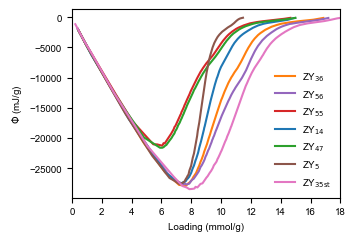

In [36]:
#processing BET
for i in range(len(isotherms)):
    result_BET = pgc.area_BET(isotherms[i],verbose=False ) # to show additional paremeters set verbose to True and uncomment plt.show()
    plt.show()
    #writing to databse:
    dbq.write_db(codes[i],'S.A.(BET)',np.round(result_BET['area'],0))

#ESW analysis
plot_ESW=True # plots ESW function from whose minimum the monolayer covarege is extracted - see 10.1016/j.apsusc.2006.12.089
if plot_ESW == True:
    fig, ax = plt.subplots()
for i in range(len(isotherms)):
    isotherms[i].convert_loading(unit_to='mmol')
    pressure = isotherms[i].data(branch = 'ads')['pressure']
    loading = isotherms[i].data(branch = 'ads')['loading']
    dmu = 8.3145*isotherms[i].temperature*np.log(pressure)
    Phi = loading*dmu
    n_monolayer = loading[Phi == Phi.min()].item()
    argon_area = 0.142*1e-18*6.022e23
    ESW_surface_area = n_monolayer*argon_area/1000
    if plot_ESW == True:
        ax.plot(loading,Phi,label=labels[i],color=colors[i])
        ax.set_xlabel('Loading (mmol/g)')
        ax.set_ylabel(r'$\Phi$ (mJ/g)')
    plt.tight_layout
    dbq.write_db(codes[i],'S.A.(ESW)',ESW_surface_area) 

if plot_ESW == True:
    ax.legend(frameon= False)
    ax.set_xlim(0,18)
    plt.show()

Pore volume

In [37]:
def determine_porevolume(isotherm,p_set = 0.99):
    isotherm.convert_loading(unit_to='mol')
    pore_volume = isotherm.data(branch='ads')\
    .iloc[isotherm.data(branch='ads')['pressure'].sub(p_set).abs().idxmin()]['loading']\
        /isotherm.adsorbate.liquid_density(isotherm.temperature)\
        *isotherm.adsorbate.molar_mass()
    return pore_volume

for i in range(len(isotherms)):
    pore_volume = determine_porevolume(isotherms[i])
    dbq.write_db(codes[i],'Pore_volume_cm3',pore_volume)

t-plot analysis

In [38]:
t_frame_SiO2 = pd.read_csv(data_home + '/Physisorption_Porosimetry/Ar_87K_SiO2.csv')

def t_table(p,frame=t_frame_SiO2): 
    # instead of using a fitted function, the reference isotherm is treated as a lookup table to determine the statistical thickness
    return frame['t'].loc[frame['p/p0'].sub(p).abs().idxmin()]
t_table_v = np.vectorize(t_table)
#manually specifying t_limits
t_limits = {'Z01':[0.2,0.5],'Z02':[0.2,0.45],'Z03':[0.2,0.5],'Z04':[0.3,0.6],'Z09':[0.2,0.5],'Z11':[0.3,0.6],'Z13':[0.3,0.55]}

show_t_plots = False #set True to show t-plot fit

for i in range(len(isotherms)):
    results_tplot = pgc.t_plot(isotherms[i],t_limits=t_limits[codes[i]],thickness_model=t_table_v, verbose= show_t_plots)
    if show_t_plots:
        plt.title('t-plot '+dbq.get_catname(codes[i]))
        plt.xlabel('statistical thickness (nm)')
        plt.ylabel('loading (mmol/g)')
        plt.show()

    micropore_volume = results_tplot['results'][0]['adsorbed_volume']
    mesopore_volume = dbq.read_db(codes[i],'Pore_volume_cm3') - micropore_volume

    dbq.write_db(codes[i],'t_plot_mesopore_volume_cm3',mesopore_volume)
    dbq.write_db(codes[i],'t_plot_micropore_volume_cm3',micropore_volume)   

##### Fig 3a NL-DFT and Hg porosimetry

Hg porosimetry measurements were conducted by 3P Instruments GmbH using a poremaster 60-GT in a pressure range of 1.5-14.5 MPa. Samples were dried for 12 h at 350 °C under vacuum. A contact angle of 140° was utilized in the analysis.

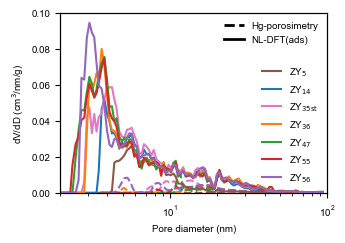

In [39]:
# As no open source kernels are available, the DFT fitting can not be conducted witout proprietay software.
# Here, only the outputs of the fitting conducted in Quadrawin are utilized.
# Same treatment for porosimetry.

data_Porestructure = data_home + '/Physisorption_Porosimetry/pore_structure/'
paths = os.listdir(data_Porestructure)
selector = [5,3,6,0,4,2,1]
colors = [dbq.read_db(paths[i],'plotcolor') for i in selector]

def read_DFT(dir):
    #reads a NL-DFT output to a dataframe
    DFT_path = dir + [file for file in os.listdir(dir) if file.endswith(".txt")][0]
    df_DFT = pd.read_csv(DFT_path,encoding='latin-1', sep='\s+', engine='python',names=['PoreRadius','CumPoreVolume', 'CumSurfArea','dV(r)','dS(r)'],skiprows=23)
    return df_DFT

def read_Poro(dir):
    #reads a Hg Porosimetry output to a dataframe
    Poro_path = dir + [file for file in os.listdir(dir) if file.endswith(".prp")][0]
    df_Poro = pd.read_csv(Poro_path,encoding='latin-1',sep='\s+', engine='python',names=['pressure','pore_diameter', 'volume_intruded','dV','%V_intruded','Dv(d)','-dV/d(log d)'],skiprows=23)
    df_Poro['logd'] = np.log10(df_Poro['pore_diameter'])
    return df_Poro


def micropore_volume_dft(df):
    return df['CumPoreVolume'][df['PoreRadius']/5<=2].max()

def mesopore_volume_dft(df):
    return df['CumPoreVolume'].max() - micropore_volume_dft(df)

def non_micropore_SA_dft(df):
    return df['CumSurfArea'].max() - df['CumSurfArea'][df['PoreRadius']/5<=2].max()

def mesopore_volume_Hg(poro, cutoff=100): #cutoff is the pore diameter in nm
    poro_mesopores = poro[(poro['pore_diameter']*1000 <= cutoff)]
    return poro_mesopores['volume_intruded'].max()-poro_mesopores['volume_intruded'].min()


Units_poro = {'pressure':'PSI','pore_diameter':'µm', 'volume_intruded':'cc/g','dV':'cc/g','%V_intruded':'%','Dv(d)':'cc/(µm-g)','-dV/d(log d)':'cc/g'}

fig, ax = plt.subplots()
ax2 = ax.twinx()
plot_selector = [5,0,3,2,1,4,6]

for i in range(len(selector)):
    path = data_Porestructure + paths[selector[i]] + '/'
    poro = read_Poro(path)
    df = read_DFT(path)
    poro_d = poro['pore_diameter']*1000

    #determine micropore and mesopore volume
    dbq.write_db(paths[selector[i]],'micropore volume (DFT)',micropore_volume_dft(df))
    dbq.write_db(paths[selector[i]],'mesopore volume (DFT)',mesopore_volume_dft(df))
    dbq.write_db(paths[selector[i]],'mesopore volume (Hg)',mesopore_volume_Hg(poro))
    dbq.write_db(paths[selector[i]],'non-micropore surface area (DFT)',non_micropore_SA_dft(df))


    if selector[i] in plot_selector:
        ax.plot(poro_d,poro['Dv(d)']/1000,linestyle='--',label= dbq.get_catname(paths[selector[i]]),color=colors[i])
        ax2.plot(df['PoreRadius']/5,df['dV(r)']*10,label= dbq.get_catname(paths[selector[i]]),color=colors[i])

#custom legend 
custom_lines = [Line2D([0], [0], color='black',linestyle='--', lw=2),Line2D([0], [0], color='black', lw=2)]
ax.legend(custom_lines, ['Hg-porosimetry','NL-DFT(ads)'], loc='upper right',frameon=False)


ax.set_xscale('log')
ax.set_xlim(2,100)
ax.set_ylim(0,0.1)
ax2.set_ylim(0,0.1)
ax.set_xlabel('Pore diameter (nm)')
ax.set_ylabel('dV/dD (cm$^3$/nm/g)')
ax2.set_yticks([])
ax2.legend(frameon=False, loc='lower right')
plt.tight_layout()
plt.savefig(fig_dir + '/pore_structure_all.svg',transparent=True,bbox_inches='tight')
plt.show()

#### Fig 3b Cracking simulation
‘Polymer molecules’ were described by an array of ones and zeros with the former representing carbon atoms and the latter bonds. The starting length of the molecules was set at 200 ‘carbon atoms’, corresponding approximately to the degree of polymerization of a PP with a Mw of 23,000 g/mol. A ‘reactor’ is represented as an array of molecules. The absolute number of ‘molecules’ mainly affects the simulation time, in the results shown herein 10 ‘molecules’ were utilized. The steps of the simulation are as follows: First, the probability of cracking a bond is determined by counting the number of bonds in the reactor relative to the starting number of bonds. If a random number is smaller than this probability, a bond will be cracked, otherwise the next timestep is initiated. This enforces first order kinetics in bonds-broken. The molecules in which the bond will be cracked is selected with probability proportional to its size. The bond within the molecule is selected with a probability depending on the selected model (e.g. gaussian around the middle of the chain). After ‘cracking’ of the bond (described by splitting the array in two at the selected bond), ‘small molecules’ containing 10 carbon atoms or less are removed from the reactor, and the ‘weight’ is calculated by summing of the ‘reactor’ array. The simulation was ran for 400 timesteps and averaged over five repeats. 

In [40]:
#specify whether to rerun the simulation or use precalculated data (can take a couple of minutes)
rerun_simulation = False

# defining probablility models

def prob_gaussian(molecule):
    '''
    Takes in a list of 1s and 0s representing a 'polymer' molecule and returns a list of probabilities for each 0 in the list.
    Probability is described by a gaussian centered around the middle of the chain, with a st. dev. of 20% of the length of the chain.
    The probability is normalized to sum to 1.
    When the chain becomes to shoort (less than 5 bonds), the probability is set to be uniform across the molecule.
    '''
    bond_positions = [i for i, e in enumerate(molecule) if e == 0]
    mean = len(bond_positions) // 2  # Set the mean to be in the middle of the list
    # std_dev = 5
    std_dev = len(bond_positions) // 5  # Set the standard deviation to be a 20% of the list

    if len(bond_positions) <=5:
        probabilities = [1/len(bond_positions) for i in range(len(bond_positions))]

    #create a gaussian distribution with the len of the selected list and a sum of 1
    else:
        probabilities = np.array([1 / (std_dev * math.sqrt(2 * math.pi)) *
                    math.exp(-(x - mean)**2 / (2 * std_dev**2))
                    for x in range(len(bond_positions))])
    normalized_probabilities = [p / sum(probabilities) for p in probabilities]
    return normalized_probabilities

def cutoff_inv_exp(num):
    if num <30:
        return np.exp(-num)
    else:
        return 0
inv_exp_cutoff = np.vectorize(cutoff_inv_exp)

def prob_exp_fromend(molecule):
    '''
    Takes in a list of 1s and 0s representing a 'polymer' molecule and returns a list of probabilities for each 0 in the list.
    Probability is described by an exponential function with a cutoff at 30 bonds from the end of the chain.
    The probability is normalized to sum to 1.
    '''
    bond_postions = [i for i, e in enumerate(molecule) if e == 0]
    probabilities = inv_exp_cutoff(np.arange(len(bond_postions)))
    normalized_probabilities = [p / sum(probabilities) for p in probabilities]
    return normalized_probabilities

 WARNING | (RuntimeWarning) divide by zero encountered in log
 WARNING | (UserWarning) set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


Using precalculated data for the simulation plot. Set rerun_simulation to True to rerun the simulation.


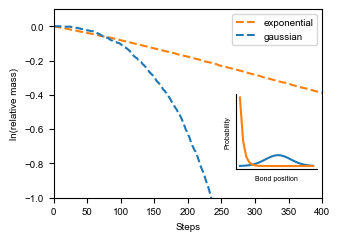

In [41]:
%matplotlib inline
repeats = 5
models = [prob_gaussian,prob_exp_fromend]
model_names = {prob_gaussian:'gaussian',prob_exp_fromend:'exponential'}
if rerun_simulation == True:
    for model in models:
        print('begin ' + model_names[model])
        master_array_reactor = []
        master_array_product = []
        for i in range(repeats):
            molecule = [1,0] * 200 # 600 is very rougly the degree of polymerization in 27,000 Mw g/mol PP 
            molecule.append(1)
            steps = 400
            min_length = 10 #very rough estimate of a big PP oligomer with a low enough boiling point
            mass_product = []
            mass_reactor = []
            starting_bonds = sum([molecule.count(0) for molecule in [molecule]])

            reactor_track = []
            product_track = [[0,0,0]]
            reactor = [10*molecule]
            products = []
            reactor_track.append(cs.status(reactor))

            for j in range(steps):
                #calcualte the probablility that a molecule will be cracked
                bonds_in_reactor = sum([molecule.count(0) for molecule in reactor])
                prob_crack = bonds_in_reactor/starting_bonds
                #determine if a molecule will be cracked
                if random.random() < prob_crack:
                    reactor = cs.crack_molecules(reactor, model)
                products_removed, reactor = cs.remove_short_molecules(reactor, min_length)
                products+=products_removed
                reactor_track.append(cs.status(reactor))
                product_track.append(cs.status(products))

            ar_reactor_track = np.array(reactor_track)
            ar_product_track = np.array(product_track)
            mass_product.append(ar_product_track[:,1])
            mass_reactor.append(ar_reactor_track[:,1])
            master_array_reactor.append(np.array(mass_reactor))
        print('done ' + model_names[model])

        # sum the master array 
        mean_reactor = np.sum(master_array_reactor, axis=0)/repeats
        np.savetxt('results/simulation/'+model_names[model]+'.csv',mean_reactor,delimiter=',')

else:
    print('Using precalculated data for the simulation plot. Set rerun_simulation to True to rerun the simulation.')


#plotting----------------------------------------

sim_outputs = os.listdir('results/simulation/')
fig, ax = plt.subplots()
colors = {'gaussian.csv':'C0','exponential.csv':'C1'}
for i in sim_outputs:
    data = pd.read_csv('results/simulation/' + i, header=None).T
    ax.plot(np.log(data[0]/data[0][0]), label=i.split('.')[0], linestyle='--',color=colors[i])
ax.set_xlim(0,400)
ax.set_ylim(-1,0.1)
ax.set_xlabel('Steps')
ax.set_ylabel('ln(relative mass)')

#inset------------
selected_molecule = [1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

axin = ax.inset_axes([0.68, 0.15, 0.3, 0.4])
#fontsize of axis is 5
axin.set_xticklabels(axin.get_xticks(), fontsize=5)
#remove ticks on x axis
axin.set_xticks([])
axin.set_yticks([])
#remove y axis
axin.set_xlabel('Bond position', fontsize=5)
axin.set_ylabel('Probability', fontsize=5)
for i in range(len(models)):
    axin.plot(models[i](selected_molecule), label=models[i])
    #turn off frame
    axin.spines['top'].set_visible(False)
    axin.spines['right'].set_visible(False)
plt.legend()
plt.savefig(fig_dir + '/simulation.svg',transparent=True,bbox_inches='tight')
plt.show()

#### Fig. 3 d Coil size calculation 

In [42]:
mw = 27000
n = mw/21.04
coil_size = np.sqrt(6.15*mw/(21.04)*1.54**2)/10
rmax = n*1.54*np.cos(68/360*(2*np.pi)/2)/10
print('Coil size')
print(int(np.round(coil_size)))
print('nm')
print('Extended chain lenght:')
print(int(np.round(rmax)))
print('nm')

Coil size
14
nm
Extended chain lenght:
164
nm


### Selectivity Analysis

Analysis of the reaction selectivity can be a powerful tool in shedding light on the reaction mechanism. Furthermore, the acidity of the zeolite material might be a tunable parameter that could steer the selectivity of the reaction. To analyze the effect of acidity on reaction selectivity, PP cracking was conducted in a semi-batch reactor on a 2.5 g PP scale using a catalyst loading of 25 wt%, similar to a previously described procedure.[23,41] The temperature was raised at 10 °C/min to 450 °C under N<sub>2</sub> flow. Liquid products were caught in cold traps containing icewater and analyzed using two-dimensional gas chromatography with flame ionization and mass spectrometry detectors (GCxGC-FID-MS), while non-condensed products were quantified by on-line GC-MS-FID. The coke yield was determined by TGA of the spent catalyst materials. Reproducibility of the approach is shown in Fig. S8. Fig. 4a shows the evolution of non-condensed hydrocarbons over the reaction time for 4 studied catalysts. For profiles of the individual hydrocarbons we refer to Fig. S9. The evolution profiles of non-condensed hydrocarbons are very similar for all catalyst materialss under study, further demonstrating the highly similar activities for the set of catalysts under. The slight increase in light hydrocarbon yield with decreasing SAR can be explained by the increased gas-cracking activity which cracks condensable hydrocarbons into shorter molecules. Fig. 4b shows the overall yields of the reaction. Deviations from 100% were caused by minor condensation in cold sections of the autoclave which are therefore not collected in the cold traps. The selectivity is again very similar for the catalyst studied with the exemption of coking. Coke formation increases with increasing BAS content (Fig. 4c), which was also observed in ramped TGA cracking (Fig. S10, supplementary note 5). This indicates that coke formation occurs largely as a secondary reaction from primary cracking products which can enter into micropores. Aromatic formation on the other hand appears to not be affected significantly by the SAR, suggesting aromatics are formed early in the process, and not purely as a secondary reaction, in agreement with a previous study that utilized in-situ spectroscopy.[42] This implies that tuning of the reaction selectivity towards products like aromatics cannot be achieved by simply adjusting the bulk acidity of ZY in a semi-batch reactor. We expect that reaction temperature and residence time in the reactor will play a more important role. Comparing the selectivity towards propane and propene, a similar observation was made: Propene selectivity is very similar for all catalyst materials, slightly decreasing with increasing bulk BAS content (Fig. 4d). Propene formation also begins early in the reaction (Fig. S11), consistent with propene being formed mostly by chain-end scission. The slight decrease of propene formation at increasing bulk acidity might be explained by increased formation of coke through propene conversion in micropores . By comparison, propane formation occurred later in the process and increased with increasing bulk BAS content, suggesting it is formed in a secondary reaction as well. A more detailed kinetic analysis might be possible with an improved setup in which plastic would be fed at reaction temperature, and on-line detection of higher-boiling hydrocarbons using GCxGC.

![Figure 4](figures_annotated/Fig4.svg)

**Fig. 4. Effect of zeolite acidity on cracking selectivity.** *a, EEvolution of non-condensed hydrocarbons for cracking of polypropylene (PP) using different zeolite Y catalysts in a semi-batch reactor determined by on-line gas chromatography (GC). b, Cumulative yield of the reaction. Gaseous products were probed by on-line GC, liquid products were characterized by ex-situ GCxGC with flame ionization detection (FID) and mass spectrometry (MS) (see Fig. S12 for the corresponding 2D chromatograms), coke deposits were determined by thermogravimetric analysis (TGA). Deviations from 100% yield (2.5 g) are due to minor condensation in cold sections of the autoclave. c, d, Total yield of aromatics, coke, propane and propene as a function of bulk Brønsted acid site content determined by Pyridine infrared (IR) spectroscopy. Error bars taken from the error of the extincion coefficient.[29] Trend lines drawn to guide the eye.* 

### Selectivity Analysis (code)

#### Fig 4a and full processing (Fig. S9, S11, S12)

 WARNING | (UserWarning) FigureCanvasAgg is non-interactive, and thus cannot be shown
 WARNING | (UserWarning) FigureCanvasAgg is non-interactive, and thus cannot be shown
 WARNING | (UserWarning) FigureCanvasAgg is non-interactive, and thus cannot be shown


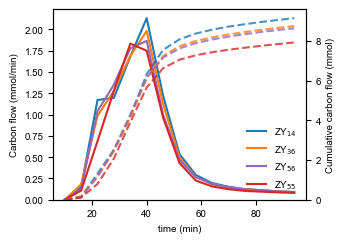

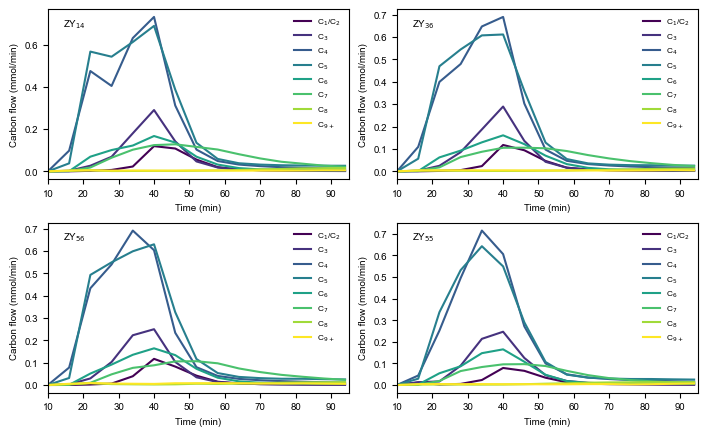

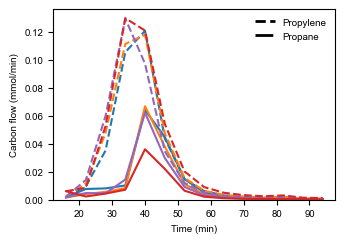

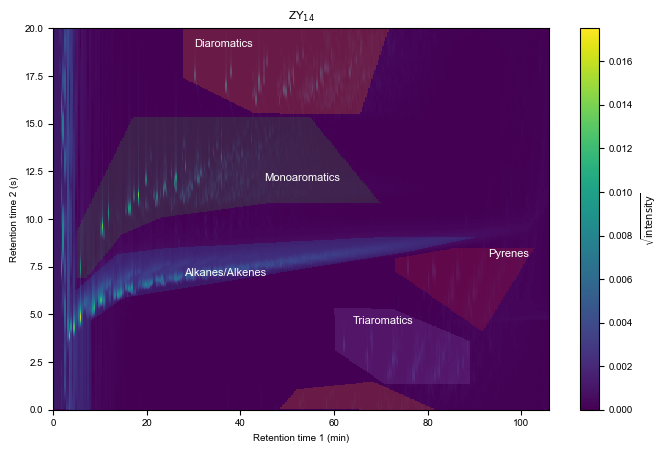

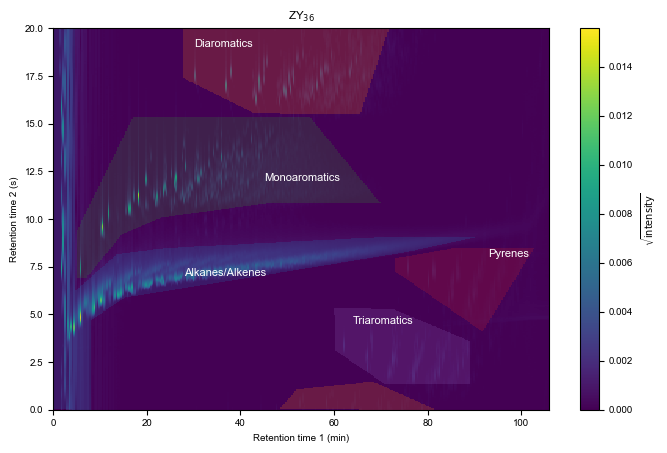

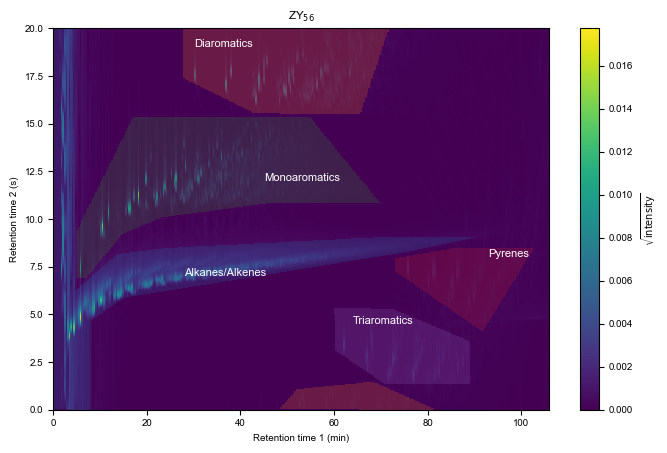

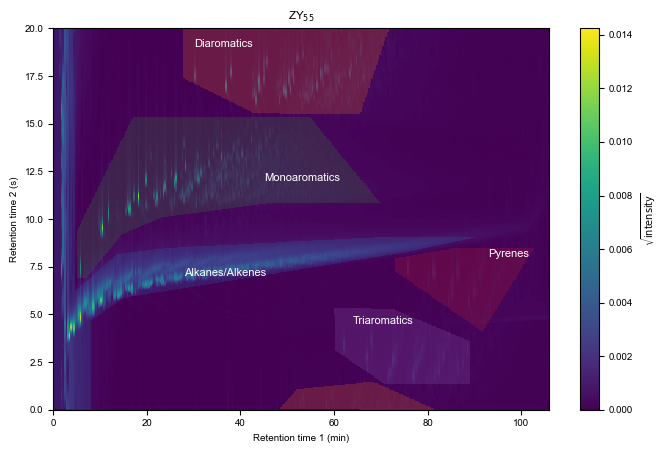

In [43]:
'''
Processing approach:
Gases coming off the reactor are captured by 50 ml/min N2 as carrier gas, and first guided through 2 cold traps cooled with icewater,
and are then fed into the on-line GC System. Here sample loops are filled at predefined intervals, capturing a 'snapshot' of the gas mixture.
Upon completion of the filling, the sample loops are injected onto the GC columns which are connected to TCD and FID-MS detectors respectively.
Metadata of the experiment is stored in a .csv file. This file contains information like the calibration factors of the on-line GC,
The type and mass of catlyst used, the time of filling the loops, weight of the condensate etc.

Short description of the processing steps:
1. Gas analysis
Using the chromeleon software, peaks in the FID chromatograms were analyzed and integration boundries for different hydrocarbon species were set.
For the TCD chromatograms, peaks were assigned by control experiments.
A similar approach is described in detail in https://onlinelibrary.wiley.com/doi/10.1002/anie.202104110
The chromatograms are loaded, and integrated withing the specified boundries, yielding areas in pA*s (FID) and mV*s (TCD).
From the TCD channel, the peak area of the internal standard (N2) is used to calculate the overall flow of gases.
The peak area corrected by the N2 flow and the calibration factor of hydrocarbon (each loop calibrated individually) yields the flow of hydrocarbons in mmol of carbon per minute.
This flow over time is integrated to yield the total amount of hydrocarbons produced in the experiment. It is converted to a mass assuming a molecular weight of 14 g/mol. (CH2)

2. Liquid analysis
The condensors used as cold traps were weighted before and after the experiment, allowing to determine the amount of liquid product.
The obtained pyrolysis oil injected undiluted into a GCxGC-MS-FID system. Since the manufactorer software did not support export of the FID data to a .csv file,
the chromatograms were first importen using the OpenChrom software and exporter to .csv from there.
To yield a 2D chromatrogram, the 1D chromatogram is split into 20 s strides, representing the modulation time. The 2D chromatogram is then created by stacking these individual 1D chromatograms.
Next, the minimum value of each stride is subtracted as baseline correction, and the chromatogram volume is normalized to 1.
To get the relative volume of each compound, the whole chromatogram is multiplied by a mask. To get a mask, the 2D chromatgram was first exported as a .tiff file.
Tis tiff file was then loaded into Fiji, in which after adjusting the aspect ratio a binary mask was created. For this the compunds in each group were analyzed using the GC-Image software.
The aspect ratio of the mask was then converted back. This approach assumes identical response factors for each compund, and is only utilized in this work to showcase the large similarities between the different zeolites.
A more sophisticated appraoch with individual response factors could be implemented on top of the underlying code.

3. Coke analysis
For coke analysis, a sample of the coked zeolite recovered form the autoclave reactor after reaction was analyzed by TGA.
The final weight after burnoff yields the amount of catalyst analyzed, the weight loss above a specified temperature yields the amount of coke/gram catalyst.
Together with the previously dermined mass of catlayst added to the raector, the total amount of coke is determined.

'''

%matplotlib inline

filedir_semibatch = data_home + '/Semibatch_plasticcracking/experiments/main/'
all_rundirs_semibatch = os.listdir(filedir_semibatch)

mask_dir = data_home + '/Semibatch_plasticcracking/gcxgc_masks/' #masks for integration of GCxGC chromatograms
plot_2Dchromatogram = True #enable to show chromatograms

#Specifying compounds and their peak boundries in the FID-chromatogram of the on-line GC
compounds = np.array(['C1/C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9+'])
peak_boundries = np.array([[1.9, 2.0], [2.0, 2.05], [2.05, 2.214], [2.214, 2.8], [2.8, 3.72], [3.72, 7.21], [7.21, 14.5], [14.5, 30]])
compound_frame = pd.DataFrame({'lower_bound': peak_boundries[:,0], 'upper_bound': peak_boundries[:,1]}, index=compounds)
compound_frame.to_csv(data_home + '/Semibatch_plasticcracking/peaklist/'+'Peaklist.csv')

#Specifying compounds and their peak boundries in the TCD-chromatogram 
compounds_TCD = np.array(['Propylene', 'Propane', 'Hydrogen','Nitrogen','Methane'])
peak_boundries_TCD = np.array([[8, 8.6],[8.6,9.3],[11.1,11.3],[12.8,14.1],[14.65,15.1]])
baseline_points = np.array([9.82,9.82,11,12.8,15]) # the baseline jumps in the TCD, therefore different points need to be selected
compound_frame_TCD = pd.DataFrame({'lower_bound': peak_boundries_TCD[:,0], 'upper_bound': peak_boundries_TCD[:,1],'baseline_point':baseline_points}, index=compounds_TCD)


multiselector = [3,2,1,0] #selecting files to analyze
filepaths = [filedir_semibatch + all_rundirs_semibatch[multiselector[i]] +'/' for i in range(len(multiselector))]
filenames = [all_rundirs_semibatch[multiselector[i]] for i in range(len(multiselector))]

liquid_masslist = []
TCD_masslist = []
export_list = []

fig, ax = plt.subplots()
ax2 = ax.twinx()

fig_indiv, ax_indivs = plt.subplots(2,2,figsize=(18/2.54,11.12/2.54))    
fig_C3, ax_C3 = plt.subplots()


for i in range(len(filepaths)):      
    meta_frame = ogc.get_meta(filepaths[i]) #to folder contains a metadatafile, which contains all additional info required for processing
    catcode = meta_frame['value']['Catalyst code:']
    catalyst_name = dbq.get_catname(catcode)

    calib_factors = ogc.get_calib_factors(meta_frame) # Calibration factors of the FID + TCD. first row is ignored!
    init = float(meta_frame['value']['GC start time:'])  # start time of filling the loops (min)
    inj_time = float(meta_frame['value']['Time sampling loop: [min]']) # time of recording of 1 injection in min
    inj_time_timelist = [init + inj_time*i for i in range(0,15)] # 14 sample loops in total. There is a big annoyance here, because we ignore the first loop. In some parts of the script this requires to use this array starting with the second element (that is, the '1')
    
    #reading and processing TCD flows from the chromatograms
    flow_frame_TCD = ogc.get_TCD_flows(filepaths[i],compound_frame_TCD)
    total_masses_TCD = ogc.get_TCD_masses(flow_frame_TCD[['Propane', 'Propylene','Hydrogen']], inj_time_timelist)

    #reading the FID chromatogram paths
    filelist_FID = glob.glob(filepaths[i]+'*FID_right*')
    filelist_FID.sort(key=len) # requiered, otherwise the injection number will start with no 10 and not 1
    filelist_FID = filelist_FID[1:]

    #processing the FID chromatograms
    path_peaklist_FID = data_home + '/Semibatch_plasticcracking/peaklist/'+'Peaklist.csv'
    integral_frame_FID = ogc.get_integral_frame(filelist_FID, path_peaklist_FID, inj_time_timelist[1:]) # obtains raw peak integrals in pA*s
    integral_frame_FID_mol = ogc.calc_molarCflow(integral_frame_FID, calib_factors, flow_frame_TCD)#using N2 internal standard and calibration factors get flow in mmol/min
    total_masses_indiv = ogc.get_indiv_integrals(integral_frame_FID_mol,inj_time_timelist) 
        
    #obtaining the amount of coke from the TGA file
    total_coke = ogc.get_coke_amount(filepaths[i],float(meta_frame['value']['Mass of catalyst: [g]']))
    #mass of liquid form the meta file
    mass_liquid =  float(meta_frame['value']['Mass of liquid sample: [g]'])

    #getting the liquid slectivities from the GCxGC chromatogram
    GCxGCpath = glob.glob(filepaths[i]+'*GCxGC*'+'/'+'*.csv')[0]
    liquid_selectivities, chromatogram_gcgc = gcgc.process_chromatogram(GCxGCpath, 20, 4, mask_dir)

    #plotting GCGC chromatogam
    if plot_2Dchromatogram:
        gcgc.plot_2Dchromatogram(chromatogram_gcgc,mask_dir,fig_dir+'/SI/'+catcode+'_2Dchromatogram.png',title=catalyst_name)

    #collecting all the outputs for export
    masses_export = pd.concat([total_masses_indiv, total_masses_TCD,pd.DataFrame(data = [mass_liquid, total_coke], index=['liquid','coke'], columns=['mass']) ], axis=1)
    export = ogc.flatten_export(masses_export,catcode)
    
    # calculating liquid mass yields
    for j in liquid_selectivities.columns.values.tolist():
        export[j] = export['liquid'][0]*liquid_selectivities[j][0]
    
    liquid_masslist.append(ogc.get_liquid_yield(meta_frame))
    export_list.append(export)
    TCD_masslist.append(masses_export)

    ax.plot(inj_time_timelist,integral_frame_FID_mol.loc['total'], label = catalyst_name,color=dbq.read_db(catcode,'plotcolor'))#label=filenames[i] + ' ' + catalyst
    ax2.plot(inj_time_timelist,integral_frame_FID_mol.cumsum(axis=1).loc['total'],alpha=0.8, linestyle='--',color=dbq.read_db(catcode,'plotcolor'))


    ax_ind = ax_indivs[i//2,i%2]
    colorlist = plt.cm.viridis(np.linspace(0, 1, len(compounds)))
    #numebrs in lowercase
    compound_name_dict = {'C1/C2':'C$_1$/C$_2$', 'C3':'C$_3$', 'C4':'C$_4$', 'C5':'C$_5$', 'C6':'C$_6$', 'C7':'C$_7$', 'C8':'C$_8$', 'C9+':'C$_{9+}$'}
    for i in range(len(compounds)):
        ax_ind.plot(inj_time_timelist,integral_frame_FID_mol.loc[compounds[i]], label=compound_name_dict[compounds[i]], color=colorlist[i])
    ax_ind.annotate(catalyst_name, xy=(0.05, 0.9), xycoords='axes fraction')
    ax_ind.legend(frameon=False, loc='upper right', fontsize=6)
    ax_ind.set_xlabel('Time (min)')
    ax_ind.set_ylabel('Carbon flow (mmol/min)')
    ax_ind.set_xlim(10,95)

    #plotting C3
    ax_C3.plot(inj_time_timelist,flow_frame_TCD['Propane'], label = catalyst_name,color=dbq.read_db(catcode,'plotcolor'))
    ax_C3.plot(inj_time_timelist,flow_frame_TCD['Propylene'],color=dbq.read_db(catcode,'plotcolor'),linestyle='--')

#plotting---------------------------------
ax.legend(loc='lower right',frameon=False)
ax.set_xlabel('time (min)')
ax.set_ylabel('Carbon flow (mmol/min)')
ax2.set_ylabel('Cumulative carbon flow (mmol)')
ax.set_ylim(0,)
ax2.set_ylim(0,)
fig.savefig(fig_dir + '/carbon_flow.svg', bbox_inches='tight',transparent=True)
fig.tight_layout()
fig.show()

fig_indiv.tight_layout()
fig_indiv.savefig(fig_dir + '/carbon_flow_individual.svg', bbox_inches='tight',transparent=True)
fig_indiv.show()



custom_lines = [Line2D([0], [0], color='black', lw=2),Line2D([0], [0], color='black', lw=2, linestyle='--')]
ax_C3.legend(custom_lines, ['Propane','Propylene'], loc='upper right',frameon=False)

ax_C3.set_xlabel('Time (min)')
ax_C3.set_ylabel('Carbon flow (mmol/min)')
ax_C3.set_ylim(0,)
ax_C3.legend(frameon=False)
# make a dashed and dotted line as legend for propane and propylene
lines = [Line2D([0], [0], color='black', lw=2, linestyle='--'),
            Line2D([0], [0], color='black', lw=2, linestyle='-.')]
labels = ['Propylene', 'Propane']
ax_C3.legend(lines, labels, loc='upper right',frameon=False)
fig_C3.tight_layout()
fig_C3.savefig(fig_dir + '/SI/carbon_flow_C3.svg', bbox_inches='tight',transparent=True)
fig_C3.show()

#### Fig. 4b Barchart of selectivities

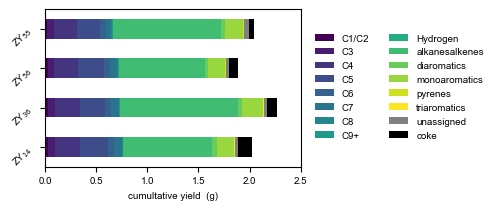

In [44]:
# making a barchart of the total yields

full = pd.concat(export_list)
full_names = [dbq.get_catname(code) for code in full.index]
full_codes = [full.index]
full.index = full_names

full['coke'] = full.pop('coke')
full.drop('liquid', axis=1, inplace=True)
colorlist= plt.cm.viridis(np.linspace(0, 1, len(full.T)-2)).tolist()
colorlist.append('grey')
colorlist.append('black')

fig, ax = plt.subplots(figsize =(3.3,3.3/1.612))
full.plot.barh(stacked=True,rot = 45, ax=ax, color=colorlist)
plt.xlim(0,2.5)
plt.xlabel(r'cumultative yield  (g)')
plt.legend(frameon=False, loc='upper right', bbox_to_anchor=(1.75, 0.9),ncol=2)
plt.savefig(fig_dir + '/cumulative_yield.svg', bbox_inches='tight',transparent=True)
plt.show()


#save full as csv

full.to_csv(result_dir + '/Semibatch_plasticcracking/Selectivities.csv')

#### Fig. 4 c,d Coke, Aromatics and C3 selectivitites

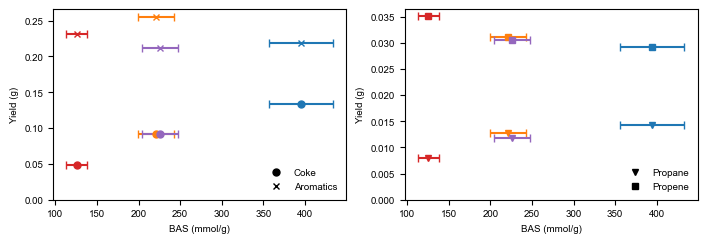

In [45]:
fig, axs = plt.subplots(1,2, figsize=(18/2.54,6.22/2.54))

codes = full_codes[0]
coke = full['coke']
total_aromatics = full['monoaromatics'] + full['diaromatics'] + full['triaromatics']+ full['pyrenes']
propene_plot = [TCD_masslist[i]['mass_TCD'].loc['Propylene'] for i in range(len(TCD_masslist))]
propane_plot = [TCD_masslist[i]['mass_TCD'].loc['Propane'] for i in range(len(TCD_masslist))]


### aromatics + coke
ax = axs[0]
for i in range(len(codes)):
    ax.errorbar(dbq.read_db(codes[i],'BAS_Py'),coke.values[i],xerr=dbq.read_db(codes[i],'BAS_Py')*0.15/1.54,marker='o',linestyle='',capsize=3,markersize=5, color=dbq.read_db(codes[i],'plotcolor'))
    ax.errorbar(dbq.read_db(codes[i],'BAS_Py'),total_aromatics.values[i],xerr=dbq.read_db(codes[i],'BAS_Py')*0.15/1.54,marker='x',linestyle='',capsize=3,markersize=5, color=dbq.read_db(codes[i],'plotcolor'), label='Aromatics')

ax.set_xlabel('BAS (mmol/g)')
ax.set_ylabel('Yield (g)')
ax.set_ylim(0,)
#cusotm legend: o = coke, x = aromatics
custom_lines = [Line2D([0], [0], color='black', marker='o',linestyle='', markersize=5),Line2D([0], [0], color='black', marker='x',linestyle='', markersize=5)]
ax.legend(custom_lines, ['Coke','Aromatics'], loc='lower right',frameon=False)

ax2 = axs[1]
for i in range(len(codes)):
    ax2.errorbar(dbq.read_db(codes[i],'BAS_Py'),propane_plot[i],xerr=dbq.read_db(codes[i],'BAS_Py')*0.15/1.54,marker='v',linestyle='',capsize=3,markersize=5, color=dbq.read_db(codes[i],'plotcolor'))
    ax2.errorbar(dbq.read_db(codes[i],'BAS_Py'),propene_plot[i],xerr=dbq.read_db(codes[i],'BAS_Py')*0.15/1.54,marker='s',linestyle='',capsize=3,markersize=5, color=dbq.read_db(codes[i],'plotcolor'), label='Aromatics')

ax2.set_xlabel('BAS (mmol/g)')
ax2.set_ylabel('Yield (g)')
ax2.set_ylim(0,)
#cusotm legend: o = coke, x = aromatics
custom_lines = [Line2D([0], [0], color='black', marker='v',linestyle='', markersize=5),Line2D([0], [0], color='black', marker='s',linestyle='', markersize=5)]
ax2.legend(custom_lines, ['Propane','Propene'], loc='lower right',frameon=False)
plt.tight_layout()
plt.savefig(fig_dir + '/aromatics_coke_yield_scatter.svg', bbox_inches='tight',transparent=True)
plt.show()

#### Figure S8 Repeatability

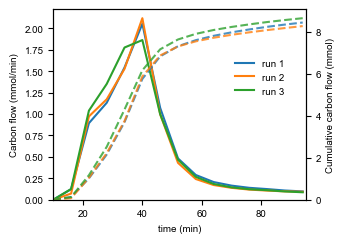

In [46]:
filedir_semibatch = data_home + '/Semibatch_plasticcracking/experiments/reproduction/'
all_rundirs_semibatch = os.listdir(filedir_semibatch)
mask_dir = data_home + '/Semibatch_plasticcracking/gcxgc_masks/'



compounds = np.array(['C1/C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9+'])
peak_boundries = np.array([[1.9, 2.0], [2.0, 2.05], [2.05, 2.214], [2.214, 2.8], [2.8, 3.72], [3.72, 7.21], [7.21, 14.5], [14.5, 30]])
compound_frame = pd.DataFrame({'lower_bound': peak_boundries[:,0], 'upper_bound': peak_boundries[:,1]}, index=compounds)
compound_frame.to_csv(data_home + '/Semibatch_plasticcracking/peaklist/'+'Peaklist.csv')



compounds_TCD = np.array(['Propylene', 'Propane', 'Hydrogen','Nitrogen','Methane'])
peak_boundries_TCD = np.array([[8, 8.6],[8.6,9.3],[11.1,11.3],[12.8,14.1],[14.65,15.1]])
baseline_points = np.array([9.82,9.82,11,12.8,15])
compound_frame_TCD = pd.DataFrame({'lower_bound': peak_boundries_TCD[:,0], 'upper_bound': peak_boundries_TCD[:,1],'baseline_point':baseline_points}, index=compounds_TCD)



multiselector = [0,1,2]
filepaths = [filedir_semibatch + all_rundirs_semibatch[multiselector[i]] +'/' for i in range(len(multiselector))]
filenames = [all_rundirs_semibatch[multiselector[i]] for i in range(len(multiselector))]

liquid_masslist = []
TCD_masslist_ = []
export_list = []


fig, ax = plt.subplots()
ax2 = ax.twinx()

for i in range(len(filepaths)):      
    meta_frame = ogc.get_meta(filepaths[i])
    catcode = meta_frame['value']['Catalyst code:']
    catalyst_name = dbq.get_catname(catcode)

    calib_factors = ogc.get_calib_factors(meta_frame) # first row is ignored!
    init = float(meta_frame['value']['GC start time:'])  # start time of filling the loops (min)
    inj_time = float(meta_frame['value']['Time sampling loop: [min]']) # time of recording of 1 injection in min
    inj_time_timelist = [init + inj_time*i for i in range(0,15)] # 14 sample loops in total. There is a big annoyance here, because we ignore the first loop. In some parts of the script this requires to use this array starting with the second element (that is, the '1')
    
    #reading and processing TCD flows from the chromatograms
    flow_frame_TCD = ogc.get_TCD_flows(filepaths[i],compound_frame_TCD)
    total_masses_TCD = ogc.get_TCD_masses(flow_frame_TCD[['Propane', 'Propylene','Hydrogen']], inj_time_timelist)

    #reading the FID chromatogram paths
    filelist_FID = glob.glob(filepaths[i]+'*FID_right*')
    filelist_FID.sort(key=len) # requiered, otherwise the injection number will start with no 10 and not 1
    filelist_FID = filelist_FID[1:]

    #processing the FID chromatograms
    path_peaklist_FID = data_home + '/Semibatch_plasticcracking/peaklist/'+'Peaklist.csv'
    integral_frame_FID = ogc.get_integral_frame(filelist_FID, path_peaklist_FID, inj_time_timelist[1:]) # the integral here is in pA*s
    integral_frame_FID_mol = ogc.calc_molarCflow(integral_frame_FID, calib_factors, flow_frame_TCD)
    total_masses_indiv = ogc.get_indiv_integrals(integral_frame_FID_mol,inj_time_timelist)
    
    #obtaining the amount of coke from the TGA file
    total_coke = ogc.get_coke_amount(filepaths[i],float(meta_frame['value']['Mass of catalyst: [g]']))
    #mass of liquid form the meta file
    mass_liquid =  float(meta_frame['value']['Mass of liquid sample: [g]'])

    #getting the liquid slectivities from the GCxGC chromatogram
    GCxGCpath = glob.glob(filepaths[i]+'*GCxGC*'+'/'+'*.csv')[0]
    liquid_selectivities = gcgc.process_chromatogram(GCxGCpath, 20, 4, mask_dir)[0]

    #collecting all the outputs for export
    masses_export = pd.concat([total_masses_indiv, total_masses_TCD,pd.DataFrame(data = [mass_liquid, total_coke], index=['liquid','coke'], columns=['mass']) ], axis=1)
    export = ogc.flatten_export(masses_export,catcode)
    
    # calculating liquid mass yields
    for j in liquid_selectivities.columns.values.tolist():
        export[j] = export['liquid'][0]*liquid_selectivities[j][0]
    
    liquid_masslist.append(ogc.get_liquid_yield(meta_frame))
    export_list.append(export)
    TCD_masslist.append(masses_export)

    ax.plot(inj_time_timelist,integral_frame_FID_mol.loc['total'], label = 'run ' + str(i+1))
    ax2.plot(inj_time_timelist,integral_frame_FID_mol.cumsum(axis=1).loc['total'],alpha=0.8, linestyle='--')


ax.legend(loc='lower right',frameon=False,bbox_to_anchor=(0.95, 0.5))
ax.set_xlabel('time (min)')
ax.set_ylabel('Carbon flow (mmol/min)')
ax2.set_ylabel('Cumulative carbon flow (mmol)')
ax.set_ylim(0,)
ax2.set_ylim(0,)
ax.set_xlim(10,95)
plt.savefig(fig_dir + '/carbon_flow_repro.svg', bbox_inches='tight',transparent=True)
plt.tight_layout()
plt.show()



## Conclusions
In order to develop improved catalyst materials for catalytic cracking of plastics, more specifically polyolefins, valuable structure-composition-performance relationships have to be developed, which are currently mainly lacking in the literature. In this work, we found for a set of zeolite-Y catalysts of different acid site contents a clear mismatch between the performance trends in the cracking of short-chain hydrocarbons and polypropylene. This shows that the structure-composition-performance relationships for the cracking of short-chain hydrocarbons and polyolefins, such as polypropylene and polyethylene, must be different. A key parameter dictating polyolefins cracking activity is the acid site content outside of the zeolite micropores, which was probed by infrared spectroscopy of substituted pyridine. Furthermore, detailed kinetic analysis relying on isothermal instead of ramped thermogravimetric analysis showed that for highly similar catalyst materials, the polyolefins cracking reaction can exhibit remarkably different sensitivities to catalyst loadings. The quantification of external acid sites, in combination with analysis of catalyst pore structure, activation energies, reaction selectivity, our previous work uncovering accessibility limitations,[23] density functional theory calculations and a simplified simulation of the polyolefins cracking reaction allows us to propose several mechanistic differences between cracking of short-chain hydrocarbons and polymers: The polyolefins cracking reaction is initiated outside of the micropores of the catalyst, and mediated largely by hydride transfer, as opposed to direct alkane activation by the acid sites. Unlike for cracking of short-chain hydrocarbons, the exact location of acid sites on the zeolite external surface becomes important, as a polyolefin molecule can contact multiple acid sites at once. Cracking at different positions along the polymer backbone can lead to large differences in weight-loss kinetics, even though the number of chemical bonds cracked remains the same. Large oligomers of the polyolefin molecule could consecutively enter the zeolite micropores, in which case a combination of high external and internal acidity could cause a non-linear increase in performance at higher catalyst loadings. Similar effects might also be prevalent for other bulky reactants, e.g., in biomass conversion. 
As selectivity towards aromatics and light olefins, such as propene, is very similar for the zeolite-based catalyst materials under study, these products are likely formed directly from the polyolefins, instead of in a secondary reaction from shorter hydrocarbons. The latter, however, is the case for coking. Reducing product residence time in the reactor might therefore be critical to reduce catalyst deactivation. To obtain a more detailed picture of the reaction mechanism, further studies will be necessary. Key goals should include probing the reaction kinetics in units of bonds broken, as opposed to weight loss, as well as understanding of the exact distribution of acid sites on the external surface of the zeolite materials. This might be achievable with high-resolution transmission electron tomography of heavy-metal exchanged zeolites. Furthermore, probing the selectivity of an isothermal polyolefins cracking reaction using on-line 2-D chromatography of higher boiling products might enable more mechanistic conclusions. 
The results reported imply that besides cracking of lighter hydrocarbons, other activity tests for cracking catalysts like the micro activity test, which has been correlated to small molecule cracking activity,[11] might also fail to reliably relate to polyolefins cracking performance. Therefore, the predictive power of historical hydrocarbon cracking activity data gathered by both academic and industrial researchers will be rather limited. Since a large share of the acid sites are not effectively used, the question can be raised whether zeolite-based materials are the appropriate catalysts for the cracking of polyolefins waste. Utilization of a proper catalyst material with ordered mesopores that could enable higher utilization of the available active sites have been proposed,43 however the high cost of the surfactants required in their synthesis is most likely prohibitively high.[44] In contrast, zeolites, like zeolite Y, which do not require organic templating agents are comparably cheap: FCC catalysts, which contain around 30 wt% zeolite,[3] cost <3 USD/kg in 2007.[45] The external acidity can be easily increased by steaming, as shown in this work. In combination with the very high bulk acid site content, we therefore believe that zeolite-based materials can play a role in direct cracking of polyolefins, provided their structure and composition can be fully tailored. 

## References

1.	Levi, P. G. & Cullen, J. M. Mapping Global Flows of Chemicals: From Fossil Fuel Feedstocks to Chemical Products. Environ. Sci. Technol. 52, 1725–1734 (2018).
2.	Vollmer, I. et al. Beyond Mechanical Recycling: Giving New Life to Plastic Waste. Angew. Chem. - Int. Ed. 59, 15402–15423 (2020).
3.	Vogt, E. T. C. & Weckhuysen, B. M. Fluid catalytic cracking: recent developments on the grand old lady of zeolite catalysis. Chem. Soc. Rev. 44, 7342–7370 (2015).
4.	LyondellBasell to Build Industrial-scale Advanced Recycling Plant in Germany. https://www.lyondellbasell.com/en/news-events/corporate--financial-news/lyondellbasell-to-build-industrial-scale-advanced-recycling-plant-in-germany/ (2023).
5.	Haag, W. O., Lago, R. M. & Weisz, P. B. The active site of acidic aluminosilicate catalysts. Nature 309, 589–591 (1984).
6.	Lago, R. M. et al. The Nature of the Catalytic Sites in HZSM-5- Activity Enhancement. in Studies in Surface Science and Catalysis vol. 28 677–684 (Elsevier,Amsterdam, 1986).
7.	Borges, P. et al. Activity–acidity relationship for alkane cracking over zeolites: n-hexane cracking over HZSM-5. J. Mol. Catal. Chem. 229, 127–135 (2005).
8.	Haag, W. O., Lago, R. M. & Weisz, P. B. Transport and reactivity of hydrocarbon molecules in a shape-selective zeolite. Faraday Discuss. Chem. Soc. 72, 317–330 (1981).
9.	Wielers A et al. Relation between properties and performance of zeolites in paraffin cracking. J. Catal. 127, 51–66 (1991).
10.	Williams, B. A., Ji, W., Miller, J. T., Snurr, R. Q. & Kung, H. H. Evidence of different reaction mechanisms during the cracking of n-hexane on H-USY zeolite. Appl. Catal. Gen. 203, 179–190 (2000).
11.	Brait, A., Seshan, K. & Lercher, J. A. Evaluation of commercial FCC catalysts for hydrocarbon conversion I. Physicochemical characterization and n-hexane conversion. Appl. Catal. Gen. 169, 299–313 (1998).
12.	Berger, F., Rybicki, M. & Sauer, J. Adsorption and cracking of propane by zeolites of different pore size. J. Catal. 395, 117–128 (2021).
13.	Fraissard, J. Why are HY Zeolites so Much More Active Than Amorphous Silica-Alumina. in Studies in Surface Science and Catalysis vol. 5 343–350 (Elsevier, Amsterdam, 1980).
14.	Dong, Z. et al. Understanding the Structure–Activity Relationships in Catalytic Conversion of Polyolefin Plastics by Zeolite-Based Catalysts: A Critical Review. ACS Catal. 12, 14882–14901 (2022).
15.	Haag, W. O., Dessau, R. M. & Lago, R. M. Kinetics and Mechanism of Paraffin Cracking with Zeolite Catalysts. in Chemistry of Microporous Crystals (eds. lnui, T., Namba, S. & Tatsumi, T. B. T.-S. in S. S. and C.) vol. 60 255–265 (Elsevier, 1991).
16.	Mastalski, I. et al. Intrinsic Millisecond Kinetics of Polyethylene Pyrolysis via Pulse-Heated Analysis of Solid Reactions. Chem. Mater. 35, 3628–3639 (2023).
17.	Barrie, P. J. The mathematical origins of the kinetic compensation effect: 1. the effect of random experimental errors. Phys. Chem. Chem. Phys. 14, 318–326 (2012).
18.	Barrie, P. J. The mathematical origins of the kinetic compensation effect: 2. the effect of systematic errors. Phys. Chem. Chem. Phys. 14, 327–336 (2012).
19.	Van Bokhoven, J. A. et al. Observation of a compensation relation for monomolecular alkane cracking by zeolites: The dominant role of reactant sorption. J. Catal. 224, 50–59 (2004).
20.	Serrano, D. P., Aguado, J., Escola, J. M. & Rodríguez, J. M. Influence of nanocrystalline HZSM-5 external surface on the catalytic cracking of polyolefins. J. Anal. Appl. Pyrolysis 74, 353–360 (2005).
21.	Hittinger, J. P. & Shantz, D. F. Systematic study of low temperature cracking of low-density polyethylene with ZSM-5. Microporous Mesoporous Mater. 343, 112170 (2022).
22.	Pérez‐Ramírez, J., Abelló, S., Bonilla, A. & Groen, J. C. Tailored Mesoporosity Development in Zeolite Crystals by Partial Detemplation and Desilication. Adv. Funct. Mater. 19, 164–172 (2009).
23.	Rejman, S. et al. Transport limitations in polyolefin cracking at the single catalyst particle level. Chem. Sci. 14, 10068–10080 (2023).
24.	Irion, W. W. & Neuwirth, O. S. Oil Refining. in Ullmann’s Encyclopedia of Industrial Chemistry (ed. Wiley-VCH Verlag GmbH & Co. KGaA) a18_051 (Wiley-VCH Verlag GmbH & Co. KGaA, Weinheim, Germany, 2000). doi:10.1002/14356007.a18_051.
25.	Lakiss, L. et al. Unlocking the Potential of Hidden Sites in Faujasite: New Insights in a Proton Transfer Mechanism. Angew. Chem. Int. Ed. 60, 26702–26709 (2021).
26.	Kenvin, J. et al. Quantifying the Complex Pore Architecture of Hierarchical Faujasite Zeolites and the Impact on Diffusion. Adv. Funct. Mater. 26, 5621–5630 (2016).
27.	Li, K., Valla, J. & Garcia‐Martinez, J. Realizing the Commercial Potential of Hierarchical Zeolites: New Opportunities in Catalytic Cracking. ChemCatChem 6, 46–66 (2014).
28.	Liu, C., Li, G., Hensen, E. J. M. & Pidko, E. A. Nature and Catalytic Role of Extraframework Aluminum in Faujasite Zeolite: A Theoretical Perspective. ACS Catal. 5, 7024–7033 (2015).
29.	Zholobenko, V. et al. Probing the acid sites of zeolites with pyridine: Quantitative AGIR measurements of the molar absorption coefficients. J. Catal. 385, 52–60 (2020).
30.	Lakiss, L. et al. Probing the Brønsted Acidity of the External Surface of Faujasite‐Type Zeolites. ChemPhysChem 21, 1873–1881 (2020).
31.	Beutel, T. W., Willard, A. M., Lee, C., Martinez, M. S. & Dugan, R. Probing External Brønsted Acid Sites in Large Pore Zeolites with Infrared Spectroscopy of Adsorbed 2,4,6-Tri-tert-butylpyridine. J. Phys. Chem. C 125, 8518–8532 (2021).
32.	Corma, A. et al. 2,6-Di-Tert-Butyl-Pyridine as a Probe Molecule to Measure External Acidity of Zeolites. J. Catal. 179, 451–458 (1998).
33.	Balcom, H., Hoffman, A. J., Locht, H. & Hibbitts, D. Brønsted Acid Strength Does Not Change for Bulk and External Sites of MFI Except for Al Substitution Where Silanol Groups Form. ACS Catal. 13, 4470–4487 (2023).
34.	Marcilla, A., Gómez, A., Reyes-Labarta, J. A., Giner, A. & Hernández, F. Kinetic study of polypropylene pyrolysis using ZSM-5 and an equilibrium fluid catalytic cracking catalyst. J. Anal. Appl. Pyrolysis 68–69, 467–480 (2003).
35.	Chorkendorff, I. & Niemantsverdriet, J. W. Concepts of Modern Catalysis and Kinetics. (Wiley, 2003). doi:10.1002/3527602658.
36.	Mendelson, R. A. On the temperature dependence of the melt viscosity of crystalline polypropylene. J. Polym. Sci. [B] 5, 295–299 (1967).
37.	Washburn, E. W. The Dynamics of Capillary Flow. Phys. Rev. 17, 273–283 (1921).
38.	Remy, M. J. et al. Dealuminated H−Y Zeolites: Relation between Physicochemical Properties and Catalytic Activity in Heptane and Decane Isomerization. J. Phys. Chem. 100, 12440–12447 (1996).
39.	Madras, G. & McCoy, B. J. Time evolution to similarity solutions for polymer degradation. AIChE J. 44, 647–655 (1998).
40.	Tennakoon, A. et al. Catalytic upcycling of high-density polyethylene via a processive mechanism. Nat. Catal. 3, 893–901 (2020).
41.	Vollmer, I., Jenks, M. J. F., Mayorga González, R., Meirer, F. & Weckhuysen, B. M. Plastic Waste Conversion over a Refinery Waste Catalyst. Angew. Chem. Int. Ed. 60, 16101–16108 (2021).
42.	Vollmer, I. et al. Unravelling potential reaction intermediates during catalytic pyrolysis of polypropylene with microscopy and spectroscopy. Catal. Sci. Technol. 14, 894–902 (2024).
43.	Zhang, Z. et al. Recovering waste plastics using shape-selective nano-scale reactors as catalysts. Nat. Sustain. 2, 39–42 (2019).
44.	Chal, R., Gérardin, C., Bulut, M. & van Donk, S. Overview and Industrial Assessment of Synthesis Strategies towards Zeolites with Mesopores. ChemCatChem 3, 67–81 (2011).
45.	Albemarle to increase price of fluid catalytic cracking (FCC) catalysts. https://www.prnewswire.com/news-releases/albemarle-to-increase-price-of-fluid-catalytic-cracking-fcc-catalysts-202384501.html.
46.	Iacomi, P. & Llewellyn, P. L. pyGAPS: a Python-based framework for adsorption isotherm processing and material characterisation. Adsorption 25, 1533–1542 (2019).
47.	Adolphs, J. Excess surface work-A modelless way of getting surface energies and specific surface areas directly from sorption isotherms. Appl. Surf. Sci. 253, 5645–5649 (2007).
48.	Garcia-Martinez, J. et al. Evidence of intracrystalline mesostructured porosity in zeolites by advanced gas sorption, electron tomography and rotation electron diffraction. ChemCatChem 6, 3110–3115 (2014).
49.	Galarneau, A., Villemot, F., Rodriguez, J., Fajula, F. & Coasne, B. Validity of the t-plot method to assess microporosity in hierarchical micro/mesoporous materials. Langmuir 30, 13266–13274 (2014).
50.	Kruk, M. & Jaroniec, M. Accurate Method for Calculating Mesopore Size Distributions from Argon Adsorption Data at 87 K Developed Using Model MCM-41 Materials. Chem. Mater. 12, 222–230 (2000).
51.	Travert, A. & Fernandez, C. SpectroChemPy. Zenodo https://doi.org/10.5281/ZENODO.3823841 (2024).
52.	Virtanen, P. et al. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nat. Methods 17, 261–272 (2020).
53.	Hutter, J., Iannuzzi, M., Schiffmann, F. & VandeVondele, J. CP2K: Atomistic simulations of condensed matter systems. WIREs Comput. Mol. Sci. 4, 15–25 (2014).
54.	Perdew, J. P., Burke, K. & Ernzerhof, M. Generalized Gradient Approximation Made Simple. Phys. Rev. Lett. 77, 3865–3868 (1996).
55.	Grimme, S., Ehrlich, S. & Goerigk, L. Effect of the damping function in dispersion corrected density functional theory. J. Comput. Chem. 32, 1456–1465 (2011).
56.	VandeVondele, J. & Hutter, J. Gaussian basis sets for accurate calculations on molecular systems in gas and condensed phases. J. Chem. Phys. 127, 114105 (2007).
57.	Goedecker, S., Teter, M. & Hutter, J. Separable dual-space Gaussian pseudopotentials. Phys. Rev. B 54, 1703–1710 (1996).
58.	GTH basis set generation for lanthanide ions-cp2k. https://groups.google.com/forum/#!topic/cp2k/LZLSBQUPna8 (2015).


## Author contributions
S.R. conceptualized the specific research in close consultation with I.V., and B.M.W. Z.R. conducted preliminary TGA and gas cracking experiments. Z.B. conducted batch-reactor experiments. J.L. conducted DFT calculations. C.R. conducted Al-NMR measurements. J.M.D conducted SEM measurements. S.R. conducted all remaining experiments, developed the accompanying Jupyter notebook and wrote the initial draft. I.V., J.K.vdW, E.T.C.V. and B.M.W. participated in the discussion of the experiments and related results. B.M.W. conceived the overall project and acquired the necessary funding. The manuscript was written through contribution of all authors. All authors have given approval to the final version of the manuscript.

## Acknowledgements
B. M. W. is supported by the Netherlands Organization for Scientific Research (NWO) in the frame of a Gravitation Program, MCEC (Netherlands Center for Multiscale Catalytic Energy Conversion), as well as from the Advanced Research Center (ARC) Chemical Buildings Blocks Consortium (CBBC), a public-private research consortium in the Netherlands (https://arc-cbbc.nl). This project was conducted in cooperation with TNO, as part of Brightsite. We thank Rinke Altink (TNO), Mark Roelands (TNO), Florian Meirer (Utrecht University, UU) and Michael Jenks (UU) for helpful discussions. The authors acknowledge Koen Bossers (Sabic) and Nicolaas Friederichs (Sabic) for providing the GPC analysis.
